In [1]:
%autosave 180
%load_ext autoreload
%autoreload 2

Autosaving every 180 seconds


In [2]:
import catboost
from catboost import CatBoostRanker, Pool, MetricVisualizer, cv
import pandas as pd
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)
pd.set_option('display.max_colwidth', None)
import os
import gc
catboost.__version__

'1.0.5'

In [4]:
from features_dict import features
from utils import flatten_list
cols_to_use = flatten_list(features.values())
print(len(cols_to_use))
df = pd.read_csv('_neat_bat/outputs/shaps_df_trained_on_train_stopped_on_val.csv')
df[df['feature'].isin(cols_to_use)].sort_values('shap', ascending=True)#.head(50)
# df.sort_values('shap', ascending=True)#.head(50)

200


feature  \
31                                                                                                                                       price_per_day_log_10   
161                                                                                                                   median_prop_location_score1_per_srch_id   
171                                                                                                                              median_price_usd_per_srch_id   
32                                                                                                                                   price_per_day_reciprocal   
172                                                                                                                                 max_price_usd_per_srch_id   
182                                                              max_price_per_day_per_srch_destination_id_per_srch_room_count_per_prop_location_score2_round   
169                                                                                           prop_review_score_rel_diff_to_min_prop_review_score_per_srch_id   
13                                                                                                                                                  price_usd   
35                                                                                                                           prop_log_historical_price_log_10   
146                                                      max_price_per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_location_score2_round   
131                                                                                     max_price_per_day_per_visitor_location_country_id_per_prop_country_id   
165                                                                                     prop_location_score1_rel_diff_to_min_prop_location_score1_per_srch_id   
105                                                                                                                 min_price_per_day_per_srch_destination_id   
104                                                                                                              median_price_per_day_per_srch_destination_id   
112                                                                       price_per_day_diff_to_max_price_per_day_per_srch_destination_id_per_prop_starrating   
67                                                                        price_per_day_diff_to_min_price_per_day_per_visitor_location_country_id_per_prop_id   
130                                               price_per_day_rel_diff_to_max_price_per_day_per_srch_destination_id_per_srch_room_count_per_prop_starrating   
50                                                                                                                                      price_per_star_log_10   
55                                                                                                                        trip_end_date_week_mid_summer_index   
145                                                     mean_price_per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_location_score2_round   
83                                                                        min_price_per_day_per_srch_destination_id_per_srch_room_count_per_prop_review_score   
37                                                                                                                                     price_diff_to_usr_hist   
111                                                                                             min_price_per_day_per_srch_destination_id_per_prop_starrating   
160                                                                                                                     mean_prop_location_score1_per_srch_id   
126                                                                         min_price_per_day_per_srch_destination_id_per_src

In [4]:
df2 = pd.read_csv('_hungry_yak_150feats4tunes/outputs/shaps_df_trained_on_train_stopped_on_val.csv')
df2[df2['feature'].isin(cols_to_use)].sort_values('shap', ascending=True)#.head(50)

feature  \
24                                                                                                                                                random_bool   
93                                                                                                                        trip_end_date_week_mid_summer_index   
82                                    price_per_day_rel_diff_to_mean_price_per_day_per_srch_destination_id_per_srch_room_count_per_prop_location_score2_round   
133                                 price_per_day_rel_diff_to_median_price_per_day_per_srch_destination_id_per_srch_room_count_per_prop_location_score2_round   
11                                                                                                                                     price_diff_to_usr_hist   
31                                                                                      prop_location_score1_rel_diff_to_min_prop_location_score1_per_srch_id   
96                                                          price_per_day_diff_to_median_price_per_day_per_srch_destination_id_per_prop_location_score2_round   
85                                                                           max_price_per_day_per_visitor_location_country_id_per_prop_location_score2_round   
116                                                                                                                   median_prop_location_score1_per_srch_id   
126                                                price_per_day_rel_diff_to_min_price_per_day_per_visitor_location_country_id_per_prop_location_score2_round   
103                                                                                    mean_price_per_day_per_visitor_location_country_id_per_prop_country_id   
102                                                   price_per_day_diff_to_mean_price_per_day_per_visitor_location_country_id_per_prop_location_score2_round   
8                                                                mean_price_per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_review_score   
90                                                      price_per_day_rel_diff_to_median_price_per_day_per_srch_destination_id_per_prop_location_score2_round   
66                                                  price_per_day_diff_to_max_price_per_day_per_srch_destination_id_per_srch_room_count_per_prop_review_score   
57                                                                                                                       min_prop_location_score1_per_srch_id   
21                                                                                                                            mean_promotion_flag_per_srch_id   
100                                     price_per_day_diff_to_median_price_per_day_per_srch_destination_id_per_srch_room_count_per_prop_location_score2_round   
129                               max_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter_per_prop_review_score   
12                                         price_per_day_diff_to_min_price_per_day_per_srch_destination_id_per_srch_room_count_per_prop_location_score2_round   
48                                                                        price_per_day_diff_to_max_price_per_day_per_srch_destination_id_per_prop_starrating   
53                                                                           min_price_per_day_per_visitor_location_country_id_per_prop_location_score2_round   
63                                                                max_price_per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_review_score   
97                                                                                            prop_review_score_rel_diff_to_min_prop_review_score_per_srch_id   
10                                                              mean_price_per_day_per_srch_destination_id_per_srch_room_coun

In [6]:
merged = pd.merge(df, df2[df2['feature'].isin(cols_to_use)], on='feature', how='inner')
# merged['shap'] = merged['shap_x'] + merged['shap_y']
merged.sort_values('shap_y', ascending=True)


feature  \
65                                                                                                                                               random_bool   
44                                                                                                                       trip_end_date_week_mid_summer_index   
49                                 price_per_day_rel_diff_to_median_price_per_day_per_srch_destination_id_per_srch_room_count_per_prop_location_score2_round   
3                                                                                      prop_location_score1_rel_diff_to_min_prop_location_score1_per_srch_id   
62                                                         price_per_day_diff_to_median_price_per_day_per_srch_destination_id_per_prop_location_score2_round   
32                                                                          max_price_per_day_per_visitor_location_country_id_per_prop_location_score2_round   
51                                                                                    mean_price_per_day_per_visitor_location_country_id_per_prop_country_id   
16                                                              mean_price_per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_review_score   
10                                                     price_per_day_rel_diff_to_median_price_per_day_per_srch_destination_id_per_prop_location_score2_round   
26                                     price_per_day_diff_to_median_price_per_day_per_srch_destination_id_per_srch_room_count_per_prop_location_score2_round   
14                               max_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter_per_prop_review_score   
21                                        price_per_day_diff_to_min_price_per_day_per_srch_destination_id_per_srch_room_count_per_prop_location_score2_round   
41                                                                          min_price_per_day_per_visitor_location_country_id_per_prop_location_score2_round   
60                                                               max_price_per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_review_score   
64                                                             mean_price_per_day_per_srch_destination_id_per_srch_room_count_per_prop_location_score2_round   
66                                                                                                              median_price_per_day_per_srch_destination_id   
40                                                                                        price_per_day_diff_to_median_price_per_day_per_srch_destination_id   
35                                                       price_per_day_rel_diff_to_mean_price_per_day_per_srch_destination_id_per_prop_location_score2_round   
37                                             price_per_day_rel_diff_to_median_price_per_day_per_visitor_location_country_id_per_prop_location_score2_round   
30                                                                                     prop_location_score2_rel_diff_to_min_prop_location_score2_per_srch_id   
47                                                    price_per_day_diff_to_min_price_per_day_per_visitor_location_country_id_per_prop_location_score2_round   
39                             price_per_day_diff_to_median_price_per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_location_score2_round   
54                                             price_per_day_rel_diff_to_max_price_per_day_per_srch_destination_id_per_srch_room_count_per_prop_review_score   
20                                               price_per_day_rel_diff_to_max_price_per_day_per_srch_destination_id_per_srch_room_count_per_prop_starrating   
25                                                                                                                                   prop_location_sc

In [24]:
df3 = pd.read_csv('_moody_warthog_100feats4tunes/outputs/shaps_df_trained_on_train_stopped_on_val.csv')
df3[df3['feature'].isin(cols_to_use)].sort_values('shap', ascending=True)#.head(50)

feature  \
58                                                              min_price_per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_starrating   
1                                                             max_price_per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_review_score   
13                                                           mean_price_per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_review_score   
91                            price_per_day_rel_diff_to_min_price_per_day_per_visitor_location_country_id_per_prop_country_id_per_trip_start_date_quarter   
66                                                                                                                                  prop_star_review_diff   
3                                         price_per_day_diff_to_min_price_per_day_per_visitor_location_country_id_per_prop_id_per_trip_start_date_quarter   
68                        price_per_day_rel_diff_to_min_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter   
16                                              price_per_day_diff_to_max_price_per_day_per_srch_destination_id_per_srch_room_count_per_prop_review_score   
99                                                                                          min_price_per_day_per_srch_destination_id_per_prop_starrating   
5                                                                 price_per_day_rel_diff_to_max_price_per_day_per_visitor_location_country_id_per_prop_id   
88                                                   price_per_day_rel_diff_to_median_price_per_day_per_visitor_location_country_id_per_prop_review_score   
27                                       price_per_day_diff_to_mean_price_per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_starrating   
12                                                                                        prop_review_score_rel_diff_to_min_prop_review_score_per_srch_id   
75                                    price_per_day_rel_diff_to_max_price_per_day_per_srch_destination_id_per_srch_room_count_per_trip_start_date_quarter   
2                                                                     price_per_day_diff_to_min_price_per_day_per_visitor_location_country_id_per_prop_id   
37                                                                                                                               srch_saturday_night_bool   
44                                                                                         prop_starrating_rel_diff_to_median_prop_starrating_per_srch_id   
41                                                        price_per_day_rel_diff_to_max_price_per_day_per_visitor_location_country_id_per_prop_country_id   
15                                          price_per_day_rel_diff_to_max_price_per_day_per_srch_destination_id_per_srch_room_count_per_prop_review_score   
56                                                                    price_per_day_diff_to_max_price_per_day_per_srch_destination_id_per_prop_starrating   
42                                                        price_per_day_rel_diff_to_min_price_per_day_per_visitor_location_country_id_per_prop_country_id   
83                                                                                                                          price_per_review_score_log_10   
24                                                                                            prop_starrating_rel_diff_to_max_prop_starrating_per_srch_id   
86                                                                                    price_per_day_rel_diff_to_max_price_per_day_per_srch_destination_id   
93                                                                                                                                prop_star_usr_hist_diff   
30                                                         price

In [25]:
merged = pd.merge(merged, df3, on='feature', how='inner')
merged.rename(columns={'shap': 'shap_z'}, inplace=True)
merged['shap'] = merged['shap_x'] + merged['shap_y'] + merged['shap_z']
merged.sort_values('shap', ascending=True)

feature  \
8                                    mean_price_per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_review_score   
13                                               min_price_per_day_per_visitor_location_country_id_per_prop_location_score2_round   
2                       price_per_day_diff_to_max_price_per_day_per_srch_destination_id_per_srch_room_count_per_prop_review_score   
1    price_per_day_diff_to_mean_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter   
5                                                                                             price_index_per_srch_destination_id   
12             price_per_day_diff_to_median_price_per_day_per_srch_destination_id_per_srch_room_count_per_trip_start_date_quarter   
7                                  price_per_day_diff_to_mean_price_per_day_per_visitor_location_country_id_per_prop_review_score   
11                                 price_per_day_diff_to_min_price_per_day_per_srch_destination_id_per_prop_location_score2_round   
0                                                        mean_price_per_day_per_visitor_location_country_id_per_prop_review_score   
10                                                                                                                        srch_id   
3   price_per_day_diff_to_median_price_per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_location_score2_round   
4                                                                                                                         prop_id   
6                                                                                                                  book_per_click   
9                                                                                                              booking_prob_train   

      shap_x    shap_y    shap_z      shap  
8   0.002439  0.000077  0.000665  0.003182  
13  0.000299  0.000175  0.004519  0.004993  
2   0.003166  0.001241  0.001146  0.005552  
1   0.006185  0.002829  0.006145  0.015158  
5   0.002997  0.001540  0.011748  0.016286  
12  0.014354  0.001174  0.003660  0.019187  
7   0.014058  0.002757  0.006962  0.023777  
11  0.012743  0.004045  0.019286  0.036073  
0   0.018324  0.013404  0.023781  0.055509  
10  0.034317  0.032615  0.045261  0.112194  
3   0.095201  0.000939  0.089455  0.185594  
4   0.249530  0.256702  0.265131  0.771362  
6   0.715349  0.301949  0.788112  1.805410  
9   0.907161  0.523481  0.934648  2.365290

In [3]:
from features_dict import features
from utils import flatten_list

cols_to_use = flatten_list(features.values())
len(cols_to_use)

268

In [15]:
from features_dict import CAT_FEATURES
CAT_FEATURES = [c for c in CAT_FEATURES if c in cols_to_use]
CAT_FEATURES

['srch_id',
 'site_id',
 'prop_country_id',
 'prop_id',
 'srch_destination_id',
 'trip_start_date_week',
 'trip_start_date_week_mid_summer_index',
 'trip_start_date_week_id',
 'trip_end_date_week_mid_summer_index',
 'trip_end_date_week_id']

In [4]:
from skopt import load

res_gp = load('cold_lionfish/outputs/skopt_results.pkl')
res_gp

          fun: -0.40273841875349725
    func_vals: array([-0.40213574, -0.40215342, -0.40174767, -0.40273842])
       models: [GaussianProcessRegressor(kernel=1**2 * Matern(length_scale=[1, 1, 1, 1, 1, 1, 1], nu=2.5) + WhiteKernel(noise_level=1),
                         n_restarts_optimizer=2, noise='gaussian',
                         normalize_y=True, random_state=1608637542), GaussianProcessRegressor(kernel=1**2 * Matern(length_scale=[1, 1, 1, 1, 1, 1, 1], nu=2.5) + WhiteKernel(noise_level=1),
                         n_restarts_optimizer=2, noise='gaussian',
                         normalize_y=True, random_state=1608637542), GaussianProcessRegressor(kernel=1**2 * Matern(length_scale=[1, 1, 1, 1, 1, 1, 1], nu=2.5) + WhiteKernel(noise_level=1),
                         n_restarts_optimizer=2, noise='gaussian',
                         normalize_y=True, random_state=1608637542)]
 random_state: RandomState(MT19937) at 0x7FBA11B4A640
        space: Space([Integer(low=4, high=8, prior=

# Params

In [49]:
# cols_to_use = (original_cols + booking_date_features + prop_location_score_features +
#                competitor_features + price_features +
#                trip_detail_features + aggregate_features + uncategorized_features +
#                star_features + price_star_features +

#                per_srch_destination_id_per_srch_room_count_per_trip_start_date_quarter +
#                per_visitor_location_country_id_per_prop_id +
#                per_day_per_prop_id_per_trip_start_date_quarter +
#                per_day_per_prop_id_per_srch_room_count_per_trip_start_date_quarter +
#                #                per_visitor_location_country_id_per_srch_destination_id_per_prop_location_score2 +
#                price_per_day_per_visitor_location_country_id_per_prop_starrating +
#                per_srch_destination_id_per_srch_room_count_per_prop_review_score +
#                per_day_per_srch_destination_id_per_trip_start_date_quarter +
#                per_day_per_prop_country_id +
#                per_visitor_location_country_id_per_prop_review_score +
#                per_visitor_location_country_id_per_srch_destination_id +
#                per_prop_id +
#                per_day_per_srch_destination_id_per_prop_review_score +
#                per_trip_start_date_month +
#                per_day_per_trip_start_date_quarter +
#                target_features +
#                per_day_per_srch_destination_id +
#                per_srch_destination_id_per_prop_starrating +
#                per_day_per_prop_country_id_per_trip_start_date_quarter +
#                per_day_per_prop_country_id_per_srch_room_count_per_trip_start_date_quarter +
#                per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_starrating +
#                per_day_per_visitor_location_country_id_per_prop_country_id_per_trip_start_date_quarter +
#                per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter_per_prop_review_score +
#                per_day_per_trip_start_date_month_per_srch_destination_id +
#                per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_review_score +
#                per_day_per_visitor_location_country_id_per_srch_destination_id_per_prop_review_score)
from features_dict import features
cols_to_use = flatten_list(features.values())

len(cols_to_use)

309

In [4]:
assert len(cols_to_use) == len(set(cols_to_use)), 'some columns are duplicated'

In [8]:
# bool_cols = ['prop_brand_bool',
#              'promotion_flag',
#              'srch_saturday_night_bool',
#              'random_bool']

drop_cols = [
    'position',
    'click_bool',
    'gross_bookings_usd',
    'booking_bool',
    'train',
    'val',
    'test',
    'subm',
    'date_time',
    'date',
    'trip_start_date',
    'trip_end_date', ]

group_col = 'srch_id'
predict_item_col = 'prop_id'

DROP_DATETIME_TYPE = True

# Read data

In [9]:
data_path = 'data'

In [17]:
# # 15.05.2022 Oleg: for feature listing purposes. Do not used in modeling

# # X_val = pd.read_feather(os.path.join(data_path, 'X_val.feather'))

# cols = X_val.columns.to_list()
# cols = [c for c in cols if 'per_srch_destination_id_per_srch_room_count_per_trip_start_date_quarter' not in c]
# cols = [c for c in cols if 'per_day_per_visitor_location_country_id_per_prop_id' not in c]
# cols = [c for c in cols if 'per_day_per_prop_id_per_trip_start_date_quarter' not in c]
# cols = [c for c in cols if 'per_day_per_prop_id_per_srch_room_count_per_trip_start_date_quarter' not in c]
# cols = [c for c in cols if 'per_visitor_location_country_id_per_srch_destination_id_per_prop_location_score2' not in c]
# cols = [c for c in cols if 'price_per_day_per_visitor_location_country_id_per_prop_starrating' not in c]
# cols = [c for c in cols if 'per_srch_destination_id_per_srch_room_count_per_prop_review_score' not in c]
# cols = [c for c in cols if not c.endswith('per_day_per_srch_destination_id_per_trip_start_date_quarter')]
# cols = [c for c in cols if not c.endswith('per_day_per_prop_country_id')]
# cols = [c for c in cols if not c.endswith('per_visitor_location_country_id_per_prop_review_score')]
# cols = [c for c in cols if not c.endswith('per_visitor_location_country_id_per_srch_destination_id')]
# cols = [c for c in cols if not c.endswith('per_prop_id')]
# cols = [c for c in cols if 'per_day_per_srch_destination_id_per_prop_review_score' not in c]
# cols = [c for c in cols if not c.endswith('per_trip_start_date_month')]
# cols = [c for c in cols if not c.endswith('per_day_per_trip_start_date_quarter')]
# cols = [c for c in cols if not c.endswith('per_srch_destination_id_per_prop_starrating')]
# cols = [c for c in cols if not c.endswith('per_day_per_prop_country_id_per_trip_start_date_quarter')]
# cols = [c for c in cols if not c.endswith('per_day_per_prop_country_id_per_srch_room_count_per_trip_start_date_quarter')]
# cols = [c for c in cols if not c.endswith('per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_starrating')]
# cols = [c for c in cols if not c.endswith('per_day_per_srch_destination_id')]
# cols = [c for c in cols if not c.endswith('per_day_per_visitor_location_country_id_per_prop_country_id_per_trip_start_date_quarter')]
# cols = [c for c in cols if not c.endswith('per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter_per_prop_review_score')]
# cols = [c for c in cols if not c.endswith('per_day_per_trip_start_date_month_per_srch_destination_id')]
# cols = [c for c in cols if not c.endswith('per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_review_score')]
# cols = [c for c in cols if not c.endswith('per_day_per_visitor_location_country_id_per_srch_destination_id_per_prop_review_score')]
# cols = [c for c in cols if not c.endswith('per_day_per_srch_destination_id_per_srch_room_count_per_prop_starrating')]
# cols = [c for c in cols if not c.endswith('per_day_per_prop_location_score2_round')]
# cols = [c for c in cols if not c.endswith('per_day_per_visitor_location_country_id_per_prop_location_score2_round')]
# # cols = [c for c in cols if 'prop_location_score2' not in c]
# cols = [c for c in cols if 'per_day_per_visitor_location_country_id_per_prop_country_id' not in c]
# cols = [c for c in cols if 'per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter' not in c]
# cols = [c for c in cols if 'per_day_per_srch_destination_id_per_prop_location_score2_round' not in c]
# cols = [c for c in cols if 'per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_location_score2_round' not in c]
# cols = [c for c in cols if 'prop_starrating_per_srch_id' not in c]
# cols = [c for c in cols if 'prop_location_score2_per_srch_id' not in c]
# cols = [c for c in cols if 'prop_location_score1_per_srch_id' not in c]
# cols = [c for c in cols if 'prop_review_score_per_srch_id' not in c]
# cols = [c for c in cols if 'price_usd_per_srch_id' not in c]
# cols = [c for c in cols if 'per_day_per_srch_destination_id_per_srch_room_count_per_prop_location_score2_round' not in c]
# print(len(cols))
# # [c for c in cols if 'per_day_per_srch_destination_id_per_prop_review_score' in c]
# [c for c in cols if c.endswith('norm_by_srch_id')]
# # [c for c in cols if c.startswith('trip_start_date')]
# # sorted([c for c in cols if c not in cols_to_use])
# [c for c in cols if c not in cols_to_use]
# # [c for c in cols]


107


['index',
 'date_time',
 'visitor_location_country_id',
 'srch_length_of_stay',
 'srch_adults_count',
 'srch_room_count',
 'price_per_day',
 'price_per_trip',
 'price_per_day_diff_to_usr_hist',
 'price_per_day_ratio_to_usr_hist',
 'price_per_trip_diff_to_usr_hist',
 'price_per_trip_ratio_to_usr_hist',
 'price_per_day_diff_to_place_hist_price',
 'price_per_trip_diff_to_place_hist_price',
 'place_hist_price_diff_usr_hist',
 'prop_review_usr_hist_diff',
 'booking_weeks_ahead',
 'date',
 'trip_end_date',
 'trip_start_date_week',
 'trip_start_date_week_mid_summer_index',
 'trip_start_date_month',
 'trip_start_date_days_in_month',
 'trip_start_date_quarter',
 'trip_start_date_season_num',
 'trip_start_date_year',
 'trip_start_date_week_id',
 'trip_end_date_week',
 'trip_end_date_month',
 'trip_end_date_days_in_month',
 'trip_end_date_quarter',
 'trip_end_date_season_num',
 'trip_end_date_year',
 'trip_end_date_week_id',
 'total_people',
 'separate_children_room',
 'mean_promotion_flag_per_sr

In [54]:
X_train = pd.read_feather(os.path.join(data_path, 'X_train.feather'))#, columns=cols_to_use)
y_train = pd.read_feather(os.path.join(data_path, 'y_train.feather'))['target']
print('X_train.shape', X_train.shape)
X_train.head()

X_train.shape (3172460, 466)


index  srch_id           date_time  site_id  visitor_location_country_id  \
0  4728020       21 2013-02-18 17:16:25       15                           55   
1  4728040       21 2013-02-18 17:16:25       15                           55   
2  4728041       21 2013-02-18 17:16:25       15                           55   
3  4728033       21 2013-02-18 17:16:25       15                           55   
4  4728042       21 2013-02-18 17:16:25       15                           55   

   visitor_hist_starrating  visitor_hist_adr_usd  prop_country_id  prop_id  \
0                      NaN                   NaN              216     6225   
1                      NaN                   NaN              216    15024   
2                      NaN                   NaN              216    19748   
3                      NaN                   NaN              216    20383   
4                      NaN                   NaN              216    21183   

   prop_starrating  prop_review_score  prop_brand_bool  prop_location_score1  \
0              2.0                3.5                0                  3.85   
1              3.0                0.0                0                  2.08   
2              3.0                4.0                0                  4.19   
3              3.0                0.0                0                  3.74   
4              4.0                4.0                0                  3.78   

   prop_location_score2  prop_log_historical_price   price_usd  \
0                0.0290                       4.95  108.260002   
1                   NaN                       4.29   57.220001   
2                   NaN                       4.92   71.139999   
3                   NaN                       4.74   85.059998   
4                0.1496                       5.04  102.070000   

   promotion_flag  srch_destination_id  srch_length_of_stay  \
0               1                18161                    4   
1               0                18161                    4   
2               1                18161                    4   
3               0                18161                    4   
4               0                18161                    4   

   srch_booking_window  srch_adults_count  srch_children_count  \
0                   62                  1                    0   
1                   62                  1                    0   
2                   62                  1                    0   
3                   62                  1                    0   
4                   62                  1                    0   

   srch_room_count  srch_saturday_night_bool  srch_query_affinity_score  \
0                1                         0                        NaN   
1                1                         0                        NaN   
2                1                         0                        NaN   
3                1                         0                        NaN   
4                1                         0                        NaN   

   orig_destination_distance  random_bool  price_per_day  price_per_trip  \
0                        NaN            0     108.260002      433.040009   
1                        NaN            0      57.220001      228.880005   
2                        NaN            0      71.139999      284.559998   
3                        NaN            0      85.059998      340.239990   
4                        NaN            0     102.070000      408.279999   

   date_time_ordinal  prop_location_score_diff  prop_location_score_sum  \
0             119253                    3.8210                   3.8790   
1             119253                       NaN                      NaN   
2             119253                       NaN                      NaN   
3             119253                       NaN                      NaN   
4             119253                    3.6304                   3.9296   

   prop_location_score_mul  prop_loc

In [7]:
X_train.columns.to_list()

['index',
 'srch_id',
 'date_time',
 'site_id',
 'visitor_location_country_id',
 'visitor_hist_starrating',
 'visitor_hist_adr_usd',
 'prop_country_id',
 'prop_id',
 'prop_starrating',
 'prop_review_score',
 'prop_brand_bool',
 'prop_location_score1',
 'prop_location_score2',
 'prop_log_historical_price',
 'price_usd',
 'promotion_flag',
 'srch_destination_id',
 'srch_length_of_stay',
 'srch_booking_window',
 'srch_adults_count',
 'srch_children_count',
 'srch_room_count',
 'srch_saturday_night_bool',
 'srch_query_affinity_score',
 'orig_destination_distance',
 'random_bool',
 'price_per_day',
 'price_per_trip',
 'date_time_ordinal',
 'prop_location_score_diff',
 'prop_location_score_sum',
 'prop_location_score_mul',
 'prop_location_score_diff_log',
 'prop_location_score_sum_log',
 'prop_location_score_mul_log',
 'ratio_of_comp_with_lower_price_than_expedia',
 'comp5_rate_percent_diff_signed',
 'comp8_rate_percent_diff_signed',
 'price_per_day_pow_2',
 'price_per_day_log_10',
 'price_p

In [9]:
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [10]:
y_train.value_counts()

0    3791653
5     110715
1      66883
Name: target, dtype: int64

In [11]:
X_train.memory_usage().sum() / 1024**2

3304.630518913269

In [12]:
# # makes sure all features are categorized
# assert set() == set(X_train.columns) - set(original_cols + booking_date_features + prop_location_score_features + competitor_features + price_features + historical_price_features + trip_detail_features + aggregate_features + uncategorized_features)

In [13]:
X_train.dtypes.value_counts()#.apply(lambda x: x.name).to_dict()

float32           204
uint8              11
uint32              6
uint16              3
datetime64[ns]      2
dtype: int64

In [30]:
train_pool = Pool(data=X_train, 
                  label=y_train,
                  group_id=X_train[group_col],
                  cat_features=CAT_FEATURES,
                  )
# del X_train, y_train; gc.collect()

In [7]:
X_val = pd.read_feather(os.path.join(data_path, 'X_val.feather'))#, columns=cols_to_use)
# X_val = X_val[[c for c in X_val.columns if c not in drop_cols]]

y_val = pd.read_feather(os.path.join(data_path, 'y_val.feather'))['target']    
print('X_val.shape', X_val.shape)

X_val.shape (181007, 466)


In [8]:
X_val.head()

index  srch_id           date_time  site_id  visitor_location_country_id  \
0  7602768        6 2013-06-05 12:27:51       14                          100   
1  7602769        6 2013-06-05 12:27:51       14                          100   
2  7602767        6 2013-06-05 12:27:51       14                          100   
3  7602765        6 2013-06-05 12:27:51       14                          100   
4  7602766        6 2013-06-05 12:27:51       14                          100   

   visitor_hist_starrating  visitor_hist_adr_usd  prop_country_id  prop_id  \
0                      NaN                   NaN              100    10759   
1                      NaN                   NaN              100    22135   
2                      NaN                   NaN              100    52376   
3                      NaN                   NaN              100   104251   
4                      NaN                   NaN              100   118866   

   prop_starrating  prop_review_score  prop_brand_bool  prop_location_score1  \
0              NaN                2.0                0                  1.95   
1              NaN                5.0                0                  1.95   
2              2.0                0.0                1                  1.95   
3              3.0                4.0                1                  1.95   
4              2.0                4.5                1                  1.95   

   prop_location_score2  prop_log_historical_price   price_usd  \
0                   NaN                        NaN   97.629997   
1                   NaN                        NaN  115.029999   
2                   NaN                        NaN   86.029999   
3                   NaN                        NaN  145.000000   
4                   NaN                        NaN  183.660004   

   promotion_flag  srch_destination_id  srch_length_of_stay  \
0               0                21106                    1   
1               0                21106                    1   
2               0                21106                    1   
3               0                21106                    1   
4               0                21106                    1   

   srch_booking_window  srch_adults_count  srch_children_count  \
0                    5                  2                    0   
1                    5                  2                    0   
2                    5                  2                    0   
3                    5                  2                    0   
4                    5                  2                    0   

   srch_room_count  srch_saturday_night_bool  srch_query_affinity_score  \
0                1                         0                        NaN   
1                1                         0                        NaN   
2                1                         0                        NaN   
3                1                         0                        NaN   
4                1                         0                        NaN   

   orig_destination_distance  random_bool  price_per_day  price_per_trip  \
0                 652.840027            0      97.629997       97.629997   
1                 652.840027            0     115.029999      115.029999   
2                 652.849976            0      86.029999       86.029999   
3                 652.840027            0     145.000000      145.000000   
4                 652.780029            0     183.660004      183.660004   

   date_time_ordinal  prop_location_score_diff  prop_location_score_sum  \
0             267890                       NaN                      NaN   
1             267890                       NaN                      NaN   
2             267890                       NaN                      NaN   
3             267890                       NaN                      NaN   
4             267890                       NaN                      NaN   

   prop_location_score_mul  prop_loc

In [14]:
rand_groups = X_val[X_val['random_bool'] == 1][group_col].unique()
rand_groups

array([   408,   2708,   3206,   4409,   7810,   8007,   8509,  10107,
        13610,  15410,  16006,  16508,  18810,  19106,  20606,  20710,
        21406,  21510,  21608,  21706,  24210,  29607,  35208,  35309,
        39810,  42406,  43710,  46010,  48407,  50808,  51510,  52608,
        53406,  54306,  55210,  56610,  56908,  57210,  57409,  59107,
        61409,  63807,  68006,  69109,  70509,  72109,  72208,  72808,
        73806,  76107,  76409,  78606,  78906,  80607,  81209,  84810,
        85408,  85909,  86909,  89806,  92109,  93109,  93310,  94310,
        96207,  96610,  97208,  98208,  98409,  99509, 100908, 102207,
       102507, 103006, 104406, 104606, 108110, 110510, 111010, 113910,
       116406, 116609, 117408, 118010, 118309, 122508, 123410, 131206,
       132809, 133909, 135007, 136208, 136307, 138106, 139509, 139608,
       139807, 140409, 141009, 141810, 144008, 145606, 147506, 149710,
       150407, 151109, 152206, 152208, 153608, 154910, 156409, 158006,
      

In [17]:
rand_groups = rand_groups[:50]
X_val = X_val[~X_val[group_col].isin(rand_groups)]
X_val.shape

(180266, 466)

In [22]:
y_val.loc[X_val.index]

(180266,)

In [47]:
y_val.head()

0    0
1    0
2    0
3    5
4    0
Name: target, dtype: int64

In [51]:
len([c for c in cols_to_use if c not in X_val.columns])

8

In [52]:
[c for c in cols_to_use if c not in X_val.columns]

['min_price_per_day_per_prop_country_id',
 'price_per_day_rel_diff_to_min_price_per_day_per_prop_country_id',
 'price_per_day_diff_to_max_price_per_day_per_prop_country_id',
 'price_per_day_diff_to_max_price_per_day_per_visitor_location_country_id_per_prop_review_score',
 'price_per_day_diff_to_max_price_per_day_per_visitor_location_country_id_per_srch_destination_id',
 'price_per_day_rel_diff_to_max_price_per_day_per_visitor_location_country_id_per_srch_destination_id',
 'price_per_day_rel_diff_to_min_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_prop_starrating',
 'price_per_day_rel_diff_to_median_price_per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_review_score']

In [9]:
[c for c in X_val.columns if c not in cols_to_use]

['index',
 'date_time',
 'visitor_location_country_id',
 'srch_length_of_stay',
 'srch_adults_count',
 'srch_room_count',
 'price_per_day',
 'price_per_trip',
 'price_per_day_pow_2',
 'price_per_day_log_10',
 'price_per_day_reciprocal',
 'prop_historical_price',
 'price_per_day_diff_to_usr_hist',
 'price_per_day_ratio_to_usr_hist',
 'price_per_trip_diff_to_usr_hist',
 'price_per_trip_ratio_to_usr_hist',
 'price_per_day_diff_to_place_hist_price',
 'price_per_trip_diff_to_place_hist_price',
 'place_hist_price_diff_usr_hist',
 'prop_review_usr_hist_diff',
 'booking_weeks_ahead',
 'date',
 'trip_end_date',
 'trip_start_date_week',
 'trip_start_date_week_mid_summer_index',
 'trip_start_date_month',
 'trip_start_date_days_in_month',
 'trip_start_date_quarter',
 'trip_start_date_season_num',
 'trip_start_date_year',
 'trip_start_date_week_id',
 'trip_end_date_week',
 'trip_end_date_month',
 'trip_end_date_days_in_month',
 'trip_end_date_quarter',
 'trip_end_date_season_num',
 'trip_end_date_y

In [21]:
y_val.value_counts()

0    474415
5     13870
1      8379
Name: target, dtype: int64

In [22]:
[c for c in X_val.columns if c in drop_cols or 'date_time' in c]

['date_time_ordinal']

In [31]:
val_pool = Pool(data=X_val,
                label=y_val,
                group_id=X_val[group_col],
                cat_features=CAT_FEATURES,
                )

# del X_val, y_val; gc.collect()

# Fit final model

In [57]:
gc.collect()

15

In [58]:
params = {
    "iterations": 100,
    'loss_function': 'YetiRank', # YetiRank should be faster # hints=skip_train~false
    'custom_metric': ['NDCG:top=5;type=Base;denominator=LogPosition;hints=skip_train~false'], 
    "verbose": False,
#     'early_stopping_rounds': 50,
    'use_best_model': False,
#     'metric_period': 50,
#     "task_type": "GPU",
}

In [59]:
model = CatBoostRanker(**params)
model.fit(train_pool, eval_set=val_pool, plot=True, verbose_eval=False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [60]:
model.tree_count_

100

In [20]:
model.save_model('catboost_model')

In [ ]:
from IPython.display import FileLink
FileLink(r'catboost_model')

In [ ]:
!zip -r catboost_info.zip /kaggle/working/catboost_info/

# Eval

In [25]:
# I run this locally as don't have enough capacity to train
model = CatBoostRanker()
model.load_model('terrible_226feats_5tunes/outputs/catboost_model_train', format='cbm')

In [26]:
model.is_fitted()

True

In [6]:
cols_to_use = model.feature_names_
len(cols_to_use)

226

In [32]:
print(model.eval_metrics(val_pool,
                         'NDCG:top=5;type=Base;denominator=LogPosition',
                         ntree_start=model.tree_count_-1))
# del val_pool; gc.collect()

{'NDCG:top=5;type=Base': [0.4040699997013831]}


In [33]:
print(model.eval_metrics(train_pool,
                         'NDCG:top=5;type=Base;denominator=LogPosition',
                         ntree_start=model.tree_count_-1))

# del train_pool; gc.collect()

{'NDCG:top=5;type=Base': [0.49272081873197615]}


In [56]:
X_test = pd.read_feather(os.path.join(data_path, 'X_test.feather'))#, columns=cols_to_use)
y_test = pd.read_feather(os.path.join(data_path, 'y_test.feather'))['target']
# X_test = pd.read_feather(os.path.join('../Personalize-Expedia-Hotel-Searches/data/', 'X_test_small.feather'), columns=cols_to_use)
# y_test = pd.read_feather(os.path.join('../Personalize-Expedia-Hotel-Searches/data/', 'y_test_small.feather'))['target']

print('X_test.shape', X_test.shape)

test_pool = Pool(data=X_test.drop('date_time', axis=1),
                label=y_test,
                group_id=X_test[group_col],
                cat_features=X_test.select_dtypes(include=['category']).columns.tolist(),
                )

print(model.eval_metrics(test_pool,
                         'NDCG:top=5;type=Base;denominator=LogPosition',
                         ntree_start=model.tree_count_-1))

del X_test, y_test, test_pool; gc.collect()

# Retrain the model on train+val, with test set as eval. The hyper parameters are frozen!  

Uncomment at the end of the competition

In [ ]:
train_val_pool = Pool(data=pd.concat([X_train, X_val], axis=0),
                      label=pd.concat([y_train, y_val], axis=0),
                      group_id=pd.concat([X_train, X_val], axis=0)[group_col],
                      cat_features=CAT_FEATURES,
                      )

In [ ]:
del X_train, X_val, y_train, y_val; gc.collect()

In [ ]:
X_test = pd.read_feather(os.path.join(data_path, 'X_test.feather'), columns=cols_to_use)
y_test = pd.read_feather(os.path.join(data_path, 'y_test.feather'))['target']
test_pool = Pool(data=X_test,
                label=y_test,
                group_id=X_test[group_col],
                cat_features=CAT_FEATURES,
                )
del X_test, y_test; gc.collect()

In [ ]:
params["iterations"] += 1000

model = CatBoostRanker(**params)
model.fit(train_val_pool, eval_set=test_pool, plot=False, verbose_eval=True)

In [ ]:
model.save_model('catboost_model')

# Make preds

In [3]:
# I run this locally as don't have enough capacity to train
model = CatBoostRanker()
model.load_model('_hungry_yak_150feats4tunes/outputs/catboost_model_train', format='cbm')

In [4]:
cat_indices = model.get_cat_feature_indices()

In [5]:
model.is_fitted()

True

In [6]:
cols_to_use = model.feature_names_

In [69]:
# y_train.name = 'gt'
# y_val.name = 'gt'
# y_test.name = 'gt'

# train = pd.concat([X_train[['srch_id', 'prop_id']], y_train], axis=1)
# val = pd.concat([X_val[['srch_id', 'prop_id']], y_val], axis=1)
# test = pd.concat([X_test[['srch_id', 'prop_id']], y_test], axis=1)

# train = train.groupby('srch_id').sample(frac=1.)
# val = val.groupby('srch_id').sample(frac=1.)
# test = test.groupby('srch_id').sample(frac=1.)

In [85]:
# from metrics import ndcg

In [86]:
# val.groupby('srch_id')['gt'].apply(ndcg, at=5).mean()

0.15364444861611046

In [87]:
# train.groupby('srch_id')['gt'].apply(ndcg, at=5).mean()

0.15920404892155954

In [88]:
# test.groupby('srch_id')['gt'].apply(ndcg, at=5).mean()

0.15296758746180292

In [11]:
def predict_in_format(model, data, pool, group_col, predict_item_col, gt_col=None):
    preds = model.predict(pool)

    values = {group_col: data[group_col],
              predict_item_col: data[predict_item_col],
              'pred': preds}

    values_df = pd.DataFrame(values)
    values_df.sort_values(by=[group_col, 'pred'], ascending=[True, False], inplace=True)

    if gt_col is not None:
        values_df['gt'] = gt_col
        ndcg_score = values_df.groupby(group_col)['gt'].apply(ndcg, at=5).mean()
        print('Local test NDCG@5:', ndcg_score)

    return values_df

In [34]:
subm_df = pd.read_feather(os.path.join(data_path, 'submission_df_preprocessed.feather'))#, columns=cols_to_use)
subm_df.sort_values([group_col], inplace=True)

In [35]:
subm_df.shape

(4136750, 466)

In [29]:
subm_df.head()

price_per_day_rel_diff_to_median_price_per_day_per_srch_destination_id_per_srch_room_count_per_trip_start_date_quarter  \
0                                                                                                                 0.316524   
26                                                                                                               -0.899820   
25                                                                                                                0.128429   
23                                                                                                                0.469248   
22                                                                                                                0.362392   

    min_price_per_day_per_prop_id  \
0                       71.440002   
26                      50.000000   
25                      54.000000   
23                      55.000000   
22                      67.000000   

    price_per_day_rel_diff_to_min_price_per_day_per_srch_destination_id_per_srch_room_count_per_prop_location_score2_round  \
0                                                                                                                      NaN   
26                                                                                                                     NaN   
25                                                                                                                     NaN   
23                                                                                                                     NaN   
22                                                                                                                     NaN   

    price_usd_rel_diff_to_max_price_usd_per_srch_id  \
0                                         -0.359686   
26                                        -2.779444   
25                                        -0.733878   
23                                        -0.055863   
22                                        -0.268438   

    price_per_day_rel_diff_to_mean_price_per_day_per_visitor_location_country_id_per_prop_country_id  \
0                                                                                          -0.075041   
26                                                                                         -1.988232   
25                                                                                         -0.370897   
23                                                                                          0.165178   
22                                                                                         -0.002896   

    price_per_day_rel_diff_to_median_price_per_day_per_visitor_location_country_id_per_prop_starrating  \
0                                                                                            -0.287749   
26                                                                                           -0.439912   
25                                                                                           -0.045867   
23                                                                                            0.363108   
22                                                                                            0.234884   

    price_per_day_diff_to_median_price_per_day_per_visitor_location_country_id_per_prop_location_score2_round  \
0                                                                                                         NaN   
26                                                                                                        NaN   
25                                                                                                        NaN   
23                                                                                                        NaN   
22                                                                                                        NaN

In [20]:
subm_name = 'submission_22'
subm_filename = f'submissions/{subm_name}.csv'
subm_scores_filename = f'submissions/{subm_name}_scores.csv'

In [22]:
from utils import prepare_cats
from features_dict import CAT_FEATURES
CAT_FEATURES = [c for c in CAT_FEATURES if c in cols_to_use]
prepare_cats(subm_df, CAT_FEATURES)

In [23]:
subm_pool = Pool(
    data=subm_df,
    group_id=subm_df[group_col],
    cat_features=CAT_FEATURES,
)

output_df = predict_in_format(model, subm_df, subm_pool, group_col, predict_item_col)
del subm_df, subm_pool; gc.collect()
output_df.head(10)

srch_id prop_id      pred
24       3  131940  2.085327
12       3   63039  1.458171
4        3   27753  1.009203
15       3   79176  0.704560
18       3   91337  0.440248
1        3   11425  0.371300
9        3   46861  0.247730
6        3   43133  0.115441
0        3    6533 -0.092246
20       3   96614 -0.221216

In [24]:
output_df.to_csv(subm_scores_filename, index=False)
output_df[[group_col, 'prop_id']].to_csv(subm_filename, index=False)
del output_df; gc.collect()
pd.read_csv(subm_filename, nrows=10)

srch_id  prop_id
0        3   131940
1        3    63039
2        3    27753
3        3    79176
4        3    91337
5        3    11425
6        3    46861
7        3    43133
8        3     6533
9        3    96614

In [25]:
data_path = 'data'

In [33]:
pd.read_csv(os.path.join(data_path, 'submission_sample.csv')).shape

(4959183, 2)

In [26]:
# use locally or if you added the sample subm file to the dataset
def validate_submission(subm_sample_path, our_subm_path):
    
    subm_sample = pd.read_csv(subm_sample_path)
    our_subm = pd.read_csv(our_subm_path)
    
    assert subm_sample.shape == our_subm.shape
    assert our_subm[group_col].equals(subm_sample[group_col])
    assert our_subm.index.equals(subm_sample.index)
    assert subm_sample.groupby(group_col)['prop_id'].apply(len).to_frame().equals(
        our_subm.groupby(group_col)['prop_id'].apply(len).to_frame())
    print(our_subm_path, 'is ok to submit')
    
validate_submission(os.path.join(data_path, 'submission_sample.csv'),
                    subm_filename)

AssertionError: 

In [36]:
validate_submission(os.path.join(data_path, 'submission_sample.csv'),
                    '_fresh-starfish_150_feats_no_filtering/outputs/submissions/submission_22.csv')

_fresh-starfish_150_feats_no_filtering/outputs/submissions/submission_22.csv is ok to submit


In [37]:
validate_submission(os.path.join(data_path, 'submission_sample.csv'),
                    '_hot-gecko_150feats-latest/outputs/submissions/submission_22.csv')

AssertionError: 

Score: 0.41120

# Feature importance

In [48]:
del train_pool; gc.collect()

NameError: name 'train_pool' is not defined

In [109]:
cols_to_use = ['srch_id',
               'site_id',
               'visitor_hist_starrating',
               'visitor_hist_adr_usd',
               'prop_country_id',
               'prop_id',
               'prop_starrating',
               'prop_review_score',
               'prop_brand_bool',
               'prop_location_score1',
               'prop_location_score2',
               'prop_log_historical_price',
               'price_usd',
               'promotion_flag',
               'srch_destination_id',
               'srch_booking_window',
               'srch_children_count',
               'srch_saturday_night_bool',
               'srch_query_affinity_score',
               'orig_destination_distance',
               'random_bool',
               'comp2_rate_percent_diff',
               'comp3_rate_percent_diff',
               'comp5_rate_percent_diff',
               'date_time_ordinal',
               'prop_location_score_diff',
               'prop_location_score_sum',
               'prop_location_score_mul',
               'prop_location_score_diff_log',
               'prop_location_score_sum_log',
               'prop_location_score_mul_log',
               'ratio_of_comp_with_higher_price_than_expedia',
               'ratio_of_comp_with_lower_price_than_expedia',
               'comp5_rate_percent_diff_signed',
               'comp8_rate_percent_diff_signed',
               'price_per_day',
               'price_usd_log_10',
               'visitor_hist_adr_usd_pow_0.5',
               'prop_log_historical_price_pow_0.33',
               'prop_log_historical_price_log_10',
               'prop_log_historical_price_reciprocal',
               'price_diff_to_usr_hist',
               'price_ratio_to_usr_hist',
               'price_diff_to_place_hist_price',
               'travel_inside',
               'booking_weeks_ahead',
               'len_of_stay_to_booking_ahead_ratio',
               'children_per_adult',
               'people_per_room',
               'separate_children_room',
               'trip_start_date',
               'trip_start_date_week',
               'trip_start_date_week_mid_summer_index',
               'trip_start_date_month',
               'trip_start_date_days_in_month',
               'trip_start_date_season_num',
               'trip_start_date_week_id',
               'price_index_per_srch_id',
               'price_index_per_srch_destination_id',
               'price_index_per_prop_id',
               'srch_query_affinity_score_prob',
               'prop_star_usr_hist_diff',
               'prop_review_usr_hist_diff',
               'prop_starrating_bonus_chain',
               'prop_star_review_sum',
               'prop_star_review_diff',
               'prop_star_review_min',
               'prop_star_review_max',
               'prop_star_review_mean',
               'price_per_star',
               'price_per_review_score',
               'price_per_star_log_10',
               'price_per_review_score_log_10',
               'usr_price_per_star_log_10',
               'price_per_day_diff_to_mean_price_per_day_per_srch_destination_id_per_srch_room_count_per_trip_start_date_quarter',
               'price_per_day_rel_diff_to_mean_price_per_day_per_srch_destination_id_per_srch_room_count_per_trip_start_date_quarter',
               'price_per_day_diff_to_median_price_per_day_per_srch_destination_id_per_srch_room_count_per_trip_start_date_quarter',
               'price_per_day_rel_diff_to_median_price_per_day_per_srch_destination_id_per_srch_room_count_per_trip_start_date_quarter',
               'price_per_day_rel_diff_to_min_price_per_day_per_srch_destination_id_per_srch_room_count_per_trip_start_date_quarter',
               'price_per_day_rel_diff_to_max_price_per_day_per_srch_destination_id_per_srch_room_count_per_trip_start_date_quarter',
               'mean_price_per_day_per_visitor_location_country_id_per_prop_id',
               'median_price_per_day_per_visitor_location_country_id_per_prop_id',
               'max_price_per_day_per_visitor_location_country_id_per_prop_id',
               'price_per_day_diff_to_mean_price_per_day_per_visitor_location_country_id_per_prop_id',
               'price_per_day_rel_diff_to_mean_price_per_day_per_visitor_location_country_id_per_prop_id',
               'price_per_day_diff_to_median_price_per_day_per_visitor_location_country_id_per_prop_id',
               'price_per_day_rel_diff_to_median_price_per_day_per_visitor_location_country_id_per_prop_id',
               'price_per_day_diff_to_min_price_per_day_per_visitor_location_country_id_per_prop_id',
               'price_per_day_rel_diff_to_min_price_per_day_per_visitor_location_country_id_per_prop_id',
               'price_per_day_diff_to_max_price_per_day_per_visitor_location_country_id_per_prop_id',
               'price_per_day_rel_diff_to_max_price_per_day_per_visitor_location_country_id_per_prop_id',
               'price_per_day_diff_to_mean_price_per_day_per_visitor_location_country_id_per_prop_id_per_trip_start_date_quarter',
               'price_per_day_rel_diff_to_mean_price_per_day_per_visitor_location_country_id_per_prop_id_per_trip_start_date_quarter',
               'price_per_day_diff_to_median_price_per_day_per_visitor_location_country_id_per_prop_id_per_trip_start_date_quarter',
               'price_per_day_rel_diff_to_median_price_per_day_per_visitor_location_country_id_per_prop_id_per_trip_start_date_quarter',
               'price_per_day_diff_to_min_price_per_day_per_visitor_location_country_id_per_prop_id_per_trip_start_date_quarter',
               'price_per_day_diff_to_max_price_per_day_per_visitor_location_country_id_per_prop_id_per_trip_start_date_quarter',
               'price_per_day_rel_diff_to_max_price_per_day_per_visitor_location_country_id_per_prop_id_per_trip_start_date_quarter',
               'mean_price_per_day_per_prop_id_per_trip_start_date_quarter',
               'max_price_per_day_per_prop_id_per_trip_start_date_quarter',
               'price_per_day_diff_to_mean_price_per_day_per_prop_id_per_trip_start_date_quarter',
               'price_per_day_rel_diff_to_mean_price_per_day_per_prop_id_per_trip_start_date_quarter',
               'price_per_day_diff_to_median_price_per_day_per_prop_id_per_trip_start_date_quarter',
               'price_per_day_rel_diff_to_median_price_per_day_per_prop_id_per_trip_start_date_quarter',
               'price_per_day_diff_to_min_price_per_day_per_prop_id_per_trip_start_date_quarter',
               'price_per_day_rel_diff_to_min_price_per_day_per_prop_id_per_trip_start_date_quarter',
               'price_per_day_diff_to_max_price_per_day_per_prop_id_per_trip_start_date_quarter',
               'price_per_day_rel_diff_to_max_price_per_day_per_prop_id_per_trip_start_date_quarter',
               'price_per_day_diff_to_mean_price_per_day_per_prop_id_per_srch_room_count_per_trip_start_date_quarter',
               'price_per_day_rel_diff_to_mean_price_per_day_per_prop_id_per_srch_room_count_per_trip_start_date_quarter',
               'price_per_day_diff_to_median_price_per_day_per_prop_id_per_srch_room_count_per_trip_start_date_quarter',
               'price_per_day_rel_diff_to_median_price_per_day_per_prop_id_per_srch_room_count_per_trip_start_date_quarter',
               'price_per_day_diff_to_min_price_per_day_per_prop_id_per_srch_room_count_per_trip_start_date_quarter',
               'price_per_day_rel_diff_to_min_price_per_day_per_prop_id_per_srch_room_count_per_trip_start_date_quarter',
               'price_per_day_diff_to_max_price_per_day_per_prop_id_per_srch_room_count_per_trip_start_date_quarter',
               'price_per_day_rel_diff_to_max_price_per_day_per_prop_id_per_srch_room_count_per_trip_start_date_quarter',
               'mean_price_per_day_per_visitor_location_country_id_per_prop_starrating',
               'median_price_per_day_per_visitor_location_country_id_per_prop_starrating',
               'price_per_day_diff_to_mean_price_per_day_per_visitor_location_country_id_per_prop_starrating',
               'price_per_day_rel_diff_to_mean_price_per_day_per_visitor_location_country_id_per_prop_starrating',
               'price_per_day_diff_to_median_price_per_day_per_visitor_location_country_id_per_prop_starrating',
               'price_per_day_rel_diff_to_median_price_per_day_per_visitor_location_country_id_per_prop_starrating',
               'price_per_day_diff_to_min_price_per_day_per_visitor_location_country_id_per_prop_starrating',
               'price_per_day_rel_diff_to_min_price_per_day_per_visitor_location_country_id_per_prop_starrating',
               'price_per_day_diff_to_max_price_per_day_per_visitor_location_country_id_per_prop_starrating',
               'price_per_day_rel_diff_to_max_price_per_day_per_visitor_location_country_id_per_prop_starrating',
               'min_price_per_day_per_srch_destination_id_per_srch_room_count_per_prop_review_score',
               'price_per_day_diff_to_mean_price_per_day_per_srch_destination_id_per_srch_room_count_per_prop_review_score',
               'price_per_day_rel_diff_to_mean_price_per_day_per_srch_destination_id_per_srch_room_count_per_prop_review_score',
               'price_per_day_diff_to_median_price_per_day_per_srch_destination_id_per_srch_room_count_per_prop_review_score',
               'price_per_day_rel_diff_to_median_price_per_day_per_srch_destination_id_per_srch_room_count_per_prop_review_score',
               'price_per_day_diff_to_min_price_per_day_per_srch_destination_id_per_srch_room_count_per_prop_review_score',
               'price_per_day_rel_diff_to_min_price_per_day_per_srch_destination_id_per_srch_room_count_per_prop_review_score',
               'price_per_day_diff_to_max_price_per_day_per_srch_destination_id_per_srch_room_count_per_prop_review_score',
               'price_per_day_rel_diff_to_max_price_per_day_per_srch_destination_id_per_srch_room_count_per_prop_review_score',
               'price_per_day_diff_to_mean_price_per_day_per_srch_destination_id_per_trip_start_date_quarter',
               'price_per_day_rel_diff_to_mean_price_per_day_per_srch_destination_id_per_trip_start_date_quarter',
               'price_per_day_diff_to_median_price_per_day_per_srch_destination_id_per_trip_start_date_quarter',
               'price_per_day_rel_diff_to_median_price_per_day_per_srch_destination_id_per_trip_start_date_quarter',
               'price_per_day_diff_to_max_price_per_day_per_srch_destination_id_per_trip_start_date_quarter',
               'price_per_day_rel_diff_to_max_price_per_day_per_srch_destination_id_per_trip_start_date_quarter',
               'min_price_per_day_per_prop_country_id',
               'max_price_per_day_per_prop_country_id',
               'price_per_day_diff_to_median_price_per_day_per_prop_country_id',
               'price_per_day_rel_diff_to_median_price_per_day_per_prop_country_id',
               'price_per_day_diff_to_min_price_per_day_per_prop_country_id',
               'price_per_day_rel_diff_to_min_price_per_day_per_prop_country_id',
               'price_per_day_diff_to_max_price_per_day_per_prop_country_id',
               'price_per_day_rel_diff_to_max_price_per_day_per_prop_country_id',
               'mean_price_per_day_per_visitor_location_country_id_per_prop_review_score',
               'median_price_per_day_per_visitor_location_country_id_per_prop_review_score',
               'price_per_day_diff_to_mean_price_per_day_per_visitor_location_country_id_per_prop_review_score',
               'price_per_day_rel_diff_to_mean_price_per_day_per_visitor_location_country_id_per_prop_review_score',
               'price_per_day_diff_to_median_price_per_day_per_visitor_location_country_id_per_prop_review_score',
               'price_per_day_rel_diff_to_median_price_per_day_per_visitor_location_country_id_per_prop_review_score',
               'price_per_day_diff_to_min_price_per_day_per_visitor_location_country_id_per_prop_review_score',
               'price_per_day_diff_to_max_price_per_day_per_visitor_location_country_id_per_prop_review_score',
               'mean_price_per_day_per_visitor_location_country_id_per_srch_destination_id',
               'price_per_day_diff_to_mean_price_per_day_per_visitor_location_country_id_per_srch_destination_id',
               'price_per_day_rel_diff_to_mean_price_per_day_per_visitor_location_country_id_per_srch_destination_id',
               'price_per_day_diff_to_median_price_per_day_per_visitor_location_country_id_per_srch_destination_id',
               'price_per_day_rel_diff_to_median_price_per_day_per_visitor_location_country_id_per_srch_destination_id',
               'price_per_day_diff_to_min_price_per_day_per_visitor_location_country_id_per_srch_destination_id',
               'price_per_day_rel_diff_to_min_price_per_day_per_visitor_location_country_id_per_srch_destination_id',
               'price_per_day_diff_to_max_price_per_day_per_visitor_location_country_id_per_srch_destination_id',
               'price_per_day_rel_diff_to_max_price_per_day_per_visitor_location_country_id_per_srch_destination_id',
               'mean_price_per_day_per_prop_id',
               'median_price_per_day_per_prop_id',
               'min_price_per_day_per_prop_id',
               'max_price_per_day_per_prop_id',
               'price_per_day_diff_to_mean_price_per_day_per_prop_id',
               'price_per_day_rel_diff_to_mean_price_per_day_per_prop_id',
               'price_per_day_diff_to_median_price_per_day_per_prop_id',
               'price_per_day_rel_diff_to_median_price_per_day_per_prop_id',
               'price_per_day_diff_to_min_price_per_day_per_prop_id',
               'price_per_day_rel_diff_to_min_price_per_day_per_prop_id',
               'price_per_day_diff_to_max_price_per_day_per_prop_id',
               'price_per_day_rel_diff_to_max_price_per_day_per_prop_id',
               'min_price_per_day_per_srch_destination_id_per_prop_review_score',
               'max_price_per_day_per_srch_destination_id_per_prop_review_score',
               'price_per_day_diff_to_mean_price_per_day_per_srch_destination_id_per_prop_review_score',
               'price_per_day_rel_diff_to_mean_price_per_day_per_srch_destination_id_per_prop_review_score',
               'price_per_day_diff_to_median_price_per_day_per_srch_destination_id_per_prop_review_score',
               'price_per_day_rel_diff_to_median_price_per_day_per_srch_destination_id_per_prop_review_score',
               'price_per_day_rel_diff_to_min_price_per_day_per_srch_destination_id_per_prop_review_score',
               'price_per_day_diff_to_max_price_per_day_per_srch_destination_id_per_prop_review_score',
               'price_per_day_rel_diff_to_max_price_per_day_per_srch_destination_id_per_prop_review_score',
               'price_per_day_diff_to_mean_price_per_day_per_trip_start_date_month',
               'price_per_day_rel_diff_to_min_price_per_day_per_trip_start_date_month',
               'prop_historical_price_rel_diff_to_min_price_per_day_per_trip_start_date_month',
               'price_per_day_diff_to_max_price_per_day_per_trip_start_date_month',
               'price_per_day_rel_diff_to_max_price_per_day_per_trip_start_date_month',
               'prop_historical_price_diff_to_max_price_per_day_per_trip_start_date_month',
               'price_per_day_rel_diff_to_mean_price_per_day_per_trip_start_date_quarter',
               'prop_historical_price_diff_to_mean_price_per_day_per_trip_start_date_quarter',
               'prop_historical_price_rel_diff_to_mean_price_per_day_per_trip_start_date_quarter',
               'prop_historical_price_rel_diff_to_min_price_per_day_per_trip_start_date_quarter',
               'price_per_day_diff_to_max_price_per_day_per_trip_start_date_quarter',
               'book_per_click',
               'booking_prob_train',
               'click_prob_train',
               'mean_price_per_day_per_srch_destination_id',
               'median_price_per_day_per_srch_destination_id',
               'min_price_per_day_per_srch_destination_id',
               'max_price_per_day_per_srch_destination_id',
               'price_per_day_diff_to_mean_price_per_day_per_srch_destination_id',
               'price_per_day_rel_diff_to_mean_price_per_day_per_srch_destination_id',
               'price_per_day_diff_to_median_price_per_day_per_srch_destination_id',
               'price_per_day_rel_diff_to_median_price_per_day_per_srch_destination_id',
               'price_per_day_diff_to_min_price_per_day_per_srch_destination_id',
               'price_per_day_rel_diff_to_min_price_per_day_per_srch_destination_id',
               'price_per_day_diff_to_max_price_per_day_per_srch_destination_id',
               'price_per_day_rel_diff_to_max_price_per_day_per_srch_destination_id',
               'mean_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_prop_starrating',
               'median_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_prop_starrating',
               'min_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_prop_starrating',
               'max_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_prop_starrating',
               'price_per_day_diff_to_mean_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_prop_starrating',
               'price_per_day_rel_diff_to_mean_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_prop_starrating',
               'price_per_day_diff_to_median_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_prop_starrating',
               'price_per_day_rel_diff_to_median_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_prop_starrating',
               'price_per_day_diff_to_min_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_prop_starrating',
               'price_per_day_rel_diff_to_min_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_prop_starrating',
               'price_per_day_diff_to_max_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_prop_starrating',
               'price_per_day_rel_diff_to_max_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_prop_starrating',
               'mean_price_per_day_per_srch_destination_id_per_prop_starrating',
               'median_price_per_day_per_srch_destination_id_per_prop_starrating',
               'min_price_per_day_per_srch_destination_id_per_prop_starrating',
               'max_price_per_day_per_srch_destination_id_per_prop_starrating',
               'price_per_day_diff_to_mean_price_per_day_per_srch_destination_id_per_prop_starrating',
               'price_per_day_rel_diff_to_mean_price_per_day_per_srch_destination_id_per_prop_starrating',
               'price_per_day_diff_to_median_price_per_day_per_srch_destination_id_per_prop_starrating',
               'price_per_day_rel_diff_to_median_price_per_day_per_srch_destination_id_per_prop_starrating',
               'price_per_day_diff_to_min_price_per_day_per_srch_destination_id_per_prop_starrating',
               'price_per_day_rel_diff_to_min_price_per_day_per_srch_destination_id_per_prop_starrating',
               'price_per_day_diff_to_max_price_per_day_per_srch_destination_id_per_prop_starrating',
               'price_per_day_rel_diff_to_max_price_per_day_per_srch_destination_id_per_prop_starrating',


               'mean_price_per_day_per_visitor_location_country_id_per_prop_country_id',
               'median_price_per_day_per_visitor_location_country_id_per_prop_country_id',
               'min_price_per_day_per_visitor_location_country_id_per_prop_country_id',
               'max_price_per_day_per_visitor_location_country_id_per_prop_country_id',
               'price_per_day_diff_to_mean_price_per_day_per_visitor_location_country_id_per_prop_country_id',
               'price_per_day_rel_diff_to_mean_price_per_day_per_visitor_location_country_id_per_prop_country_id',
               'price_per_day_diff_to_median_price_per_day_per_visitor_location_country_id_per_prop_country_id',
               'price_per_day_rel_diff_to_median_price_per_day_per_visitor_location_country_id_per_prop_country_id',
               'price_per_day_diff_to_min_price_per_day_per_visitor_location_country_id_per_prop_country_id',
               'price_per_day_rel_diff_to_min_price_per_day_per_visitor_location_country_id_per_prop_country_id',
               'price_per_day_diff_to_max_price_per_day_per_visitor_location_country_id_per_prop_country_id',
               'price_per_day_rel_diff_to_max_price_per_day_per_visitor_location_country_id_per_prop_country_id',
               'mean_price_per_day_per_visitor_location_country_id_per_prop_country_id_per_trip_start_date_quarter',
               'median_price_per_day_per_visitor_location_country_id_per_prop_country_id_per_trip_start_date_quarter',
               'min_price_per_day_per_visitor_location_country_id_per_prop_country_id_per_trip_start_date_quarter',
               'max_price_per_day_per_visitor_location_country_id_per_prop_country_id_per_trip_start_date_quarter',
               'price_per_day_diff_to_mean_price_per_day_per_visitor_location_country_id_per_prop_country_id_per_trip_start_date_quarter',
               'price_per_day_rel_diff_to_mean_price_per_day_per_visitor_location_country_id_per_prop_country_id_per_trip_start_date_quarter',
               'price_per_day_diff_to_median_price_per_day_per_visitor_location_country_id_per_prop_country_id_per_trip_start_date_quarter',
               'price_per_day_rel_diff_to_median_price_per_day_per_visitor_location_country_id_per_prop_country_id_per_trip_start_date_quarter',
               'price_per_day_diff_to_min_price_per_day_per_visitor_location_country_id_per_prop_country_id_per_trip_start_date_quarter',
               'price_per_day_rel_diff_to_min_price_per_day_per_visitor_location_country_id_per_prop_country_id_per_trip_start_date_quarter',
               'price_per_day_diff_to_max_price_per_day_per_visitor_location_country_id_per_prop_country_id_per_trip_start_date_quarter',
               'price_per_day_rel_diff_to_max_price_per_day_per_visitor_location_country_id_per_prop_country_id_per_trip_start_date_quarter',
               'mean_price_per_day_per_prop_country_id_per_trip_start_date_quarter',
               'median_price_per_day_per_prop_country_id_per_trip_start_date_quarter',
               'min_price_per_day_per_prop_country_id_per_trip_start_date_quarter',
               'max_price_per_day_per_prop_country_id_per_trip_start_date_quarter',
               'price_per_day_diff_to_mean_price_per_day_per_prop_country_id_per_trip_start_date_quarter',
               'price_per_day_rel_diff_to_mean_price_per_day_per_prop_country_id_per_trip_start_date_quarter',
               'price_per_day_diff_to_median_price_per_day_per_prop_country_id_per_trip_start_date_quarter',
               'price_per_day_rel_diff_to_median_price_per_day_per_prop_country_id_per_trip_start_date_quarter',
               'price_per_day_diff_to_min_price_per_day_per_prop_country_id_per_trip_start_date_quarter',
               'price_per_day_rel_diff_to_min_price_per_day_per_prop_country_id_per_trip_start_date_quarter',
               'price_per_day_diff_to_max_price_per_day_per_prop_country_id_per_trip_start_date_quarter',
               'price_per_day_rel_diff_to_max_price_per_day_per_prop_country_id_per_trip_start_date_quarter',
               'mean_price_per_day_per_prop_country_id_per_srch_room_count_per_trip_start_date_quarter',
               'median_price_per_day_per_prop_country_id_per_srch_room_count_per_trip_start_date_quarter',
               'min_price_per_day_per_prop_country_id_per_srch_room_count_per_trip_start_date_quarter',
               'max_price_per_day_per_prop_country_id_per_srch_room_count_per_trip_start_date_quarter',
               'price_per_day_diff_to_mean_price_per_day_per_prop_country_id_per_srch_room_count_per_trip_start_date_quarter',
               'price_per_day_rel_diff_to_mean_price_per_day_per_prop_country_id_per_srch_room_count_per_trip_start_date_quarter',
               'price_per_day_diff_to_median_price_per_day_per_prop_country_id_per_srch_room_count_per_trip_start_date_quarter',
               'price_per_day_rel_diff_to_median_price_per_day_per_prop_country_id_per_srch_room_count_per_trip_start_date_quarter',
               'price_per_day_diff_to_min_price_per_day_per_prop_country_id_per_srch_room_count_per_trip_start_date_quarter',
               'price_per_day_rel_diff_to_min_price_per_day_per_prop_country_id_per_srch_room_count_per_trip_start_date_quarter',
               'price_per_day_diff_to_max_price_per_day_per_prop_country_id_per_srch_room_count_per_trip_start_date_quarter',
               'price_per_day_rel_diff_to_max_price_per_day_per_prop_country_id_per_srch_room_count_per_trip_start_date_quarter',
               'mean_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter',
               'median_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter',
               'min_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter',
               'max_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter',
               'price_per_day_diff_to_mean_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter',
               'price_per_day_rel_diff_to_mean_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter',
               'price_per_day_diff_to_median_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter',
               'price_per_day_rel_diff_to_median_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter',
               'price_per_day_diff_to_min_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter',
               'price_per_day_rel_diff_to_min_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter',
               'price_per_day_diff_to_max_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter',
               'price_per_day_rel_diff_to_max_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter',
               'mean_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter_per_prop_starrating',
               'median_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter_per_prop_starrating',
               'min_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter_per_prop_starrating',
               'max_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter_per_prop_starrating',
               'price_per_day_diff_to_mean_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter_per_prop_starrating',
               'price_per_day_rel_diff_to_mean_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter_per_prop_starrating',
               'price_per_day_diff_to_median_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter_per_prop_starrating',
               'price_per_day_rel_diff_to_median_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter_per_prop_starrating',
               'price_per_day_diff_to_min_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter_per_prop_starrating',
               'price_per_day_rel_diff_to_min_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter_per_prop_starrating',
               'price_per_day_diff_to_max_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter_per_prop_starrating',
               'price_per_day_rel_diff_to_max_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter_per_prop_starrating',
               'mean_price_per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_starrating',
               'median_price_per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_starrating',
               'min_price_per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_starrating',
               'max_price_per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_starrating',
               'price_per_day_diff_to_mean_price_per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_starrating',
               'price_per_day_rel_diff_to_mean_price_per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_starrating',
               'price_per_day_diff_to_median_price_per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_starrating',
               'price_per_day_rel_diff_to_median_price_per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_starrating',
               'price_per_day_diff_to_min_price_per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_starrating',
               'price_per_day_rel_diff_to_min_price_per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_starrating',
               'price_per_day_diff_to_max_price_per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_starrating',
               'price_per_day_rel_diff_to_max_price_per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_starrating',
               'mean_price_per_day_per_srch_destination_id_per_srch_room_count_per_prop_starrating',
               'median_price_per_day_per_srch_destination_id_per_srch_room_count_per_prop_starrating',
               'min_price_per_day_per_srch_destination_id_per_srch_room_count_per_prop_starrating',
               'max_price_per_day_per_srch_destination_id_per_srch_room_count_per_prop_starrating',
               'price_per_day_diff_to_mean_price_per_day_per_srch_destination_id_per_srch_room_count_per_prop_starrating',
               'price_per_day_rel_diff_to_mean_price_per_day_per_srch_destination_id_per_srch_room_count_per_prop_starrating',
               'price_per_day_diff_to_median_price_per_day_per_srch_destination_id_per_srch_room_count_per_prop_starrating',
               'price_per_day_rel_diff_to_median_price_per_day_per_srch_destination_id_per_srch_room_count_per_prop_starrating',
               'price_per_day_diff_to_min_price_per_day_per_srch_destination_id_per_srch_room_count_per_prop_starrating',
               'price_per_day_rel_diff_to_min_price_per_day_per_srch_destination_id_per_srch_room_count_per_prop_starrating',
               'price_per_day_diff_to_max_price_per_day_per_srch_destination_id_per_srch_room_count_per_prop_starrating',
               'price_per_day_rel_diff_to_max_price_per_day_per_srch_destination_id_per_srch_room_count_per_prop_starrating',
               'mean_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter_per_prop_review_score',
               'median_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter_per_prop_review_score',
               'min_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter_per_prop_review_score',
               'max_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter_per_prop_review_score',
               'price_per_day_diff_to_mean_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter_per_prop_review_score',
               'price_per_day_rel_diff_to_mean_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter_per_prop_review_score',
               'price_per_day_diff_to_median_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter_per_prop_review_score',
               'price_per_day_rel_diff_to_median_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter_per_prop_review_score',
               'price_per_day_diff_to_min_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter_per_prop_review_score',
               'price_per_day_rel_diff_to_min_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter_per_prop_review_score',
               'price_per_day_diff_to_max_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter_per_prop_review_score',
               'price_per_day_rel_diff_to_max_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter_per_prop_review_score',
               'mean_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_prop_review_score',
               'median_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_prop_review_score',
               'min_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_prop_review_score',
               'max_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_prop_review_score',
               'price_per_day_diff_to_mean_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_prop_review_score',
               'price_per_day_rel_diff_to_mean_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_prop_review_score',
               'price_per_day_diff_to_median_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_prop_review_score',
               'price_per_day_rel_diff_to_median_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_prop_review_score',
               'price_per_day_diff_to_min_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_prop_review_score',
               'price_per_day_rel_diff_to_min_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_prop_review_score',
               'price_per_day_diff_to_max_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_prop_review_score',
               'price_per_day_rel_diff_to_max_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_prop_review_score',
               'mean_price_per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_review_score',
               'median_price_per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_review_score',
               'min_price_per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_review_score',
               'max_price_per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_review_score',
               'price_per_day_diff_to_mean_price_per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_review_score',
               'price_per_day_rel_diff_to_mean_price_per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_review_score',
               'price_per_day_diff_to_median_price_per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_review_score',
               'price_per_day_rel_diff_to_median_price_per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_review_score',
               'price_per_day_diff_to_min_price_per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_review_score',
               'price_per_day_rel_diff_to_min_price_per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_review_score',
               'price_per_day_diff_to_max_price_per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_review_score',
               'price_per_day_rel_diff_to_max_price_per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_review_score',

               'mean_price_per_day_per_trip_start_date_month_per_srch_destination_id',
               'median_price_per_day_per_trip_start_date_month_per_srch_destination_id',
               'min_price_per_day_per_trip_start_date_month_per_srch_destination_id',
               'max_price_per_day_per_trip_start_date_month_per_srch_destination_id',
               'sum_price_per_day_per_trip_start_date_month_per_srch_destination_id',
               'price_per_day_diff_to_mean_price_per_day_per_trip_start_date_month_per_srch_destination_id',
               'price_per_day_rel_diff_to_mean_price_per_day_per_trip_start_date_month_per_srch_destination_id',
               'visitor_hist_adr_usd_diff_to_mean_price_per_day_per_trip_start_date_month_per_srch_destination_id',
               'visitor_hist_adr_usd_rel_diff_to_mean_price_per_day_per_trip_start_date_month_per_srch_destination_id',
               'prop_historical_price_diff_to_mean_price_per_day_per_trip_start_date_month_per_srch_destination_id',
               'prop_historical_price_rel_diff_to_mean_price_per_day_per_trip_start_date_month_per_srch_destination_id',
               'price_per_day_diff_to_median_price_per_day_per_trip_start_date_month_per_srch_destination_id',
               'price_per_day_rel_diff_to_median_price_per_day_per_trip_start_date_month_per_srch_destination_id',
               'visitor_hist_adr_usd_diff_to_median_price_per_day_per_trip_start_date_month_per_srch_destination_id',
               'visitor_hist_adr_usd_rel_diff_to_median_price_per_day_per_trip_start_date_month_per_srch_destination_id',
               'prop_historical_price_diff_to_median_price_per_day_per_trip_start_date_month_per_srch_destination_id',
               'prop_historical_price_rel_diff_to_median_price_per_day_per_trip_start_date_month_per_srch_destination_id',
               'price_per_day_diff_to_min_price_per_day_per_trip_start_date_month_per_srch_destination_id',
               'price_per_day_rel_diff_to_min_price_per_day_per_trip_start_date_month_per_srch_destination_id',
               'visitor_hist_adr_usd_diff_to_min_price_per_day_per_trip_start_date_month_per_srch_destination_id',
               'visitor_hist_adr_usd_rel_diff_to_min_price_per_day_per_trip_start_date_month_per_srch_destination_id',
               'prop_historical_price_diff_to_min_price_per_day_per_trip_start_date_month_per_srch_destination_id',
               'prop_historical_price_rel_diff_to_min_price_per_day_per_trip_start_date_month_per_srch_destination_id',
               'price_per_day_diff_to_max_price_per_day_per_trip_start_date_month_per_srch_destination_id',
               'price_per_day_rel_diff_to_max_price_per_day_per_trip_start_date_month_per_srch_destination_id',
               'visitor_hist_adr_usd_diff_to_max_price_per_day_per_trip_start_date_month_per_srch_destination_id',
               'visitor_hist_adr_usd_rel_diff_to_max_price_per_day_per_trip_start_date_month_per_srch_destination_id',
               'prop_historical_price_diff_to_max_price_per_day_per_trip_start_date_month_per_srch_destination_id',
               'prop_historical_price_rel_diff_to_max_price_per_day_per_trip_start_date_month_per_srch_destination_id'
               ]

In [11]:
from utils import prepare_cats

In [12]:
# del test_pool; gc.collect()

X_val = pd.read_feather(os.path.join(data_path, 'X_val.feather'), columns=cols_to_use).sample(100000)
X_val = X_val[X_val.index.isin((X_val[group_col].value_counts() > 1).index)]
prepare_cats(X_val, X_val.columns[cat_indices].to_list())
X_val.sort_values(group_col, inplace=True)
y_val = pd.read_feather(os.path.join(data_path, 'y_val.feather')).loc[X_val.index, 'target']
print('X_val.shape', X_val.shape)

val_pool = Pool(data=X_val,
                label=y_val,
                group_id=X_val[group_col],
                cat_features=X_val.columns[cat_indices].to_list(), #CAT_FEATURES,
                )

X_val.shape (2177, 150)


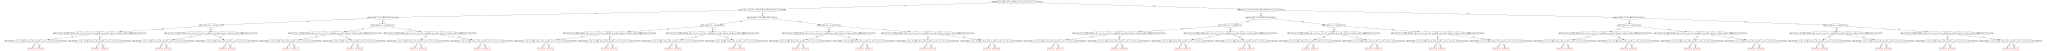

In [13]:
g = model.plot_tree(
    tree_idx=0,
    pool=val_pool
)
g

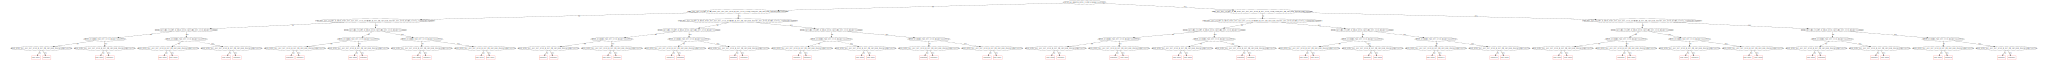

In [26]:
g = model.plot_tree(
    tree_idx=model.tree_count_-1,
    pool=val_pool
)
g

In [27]:
# g.save('tree.pdf')

In [28]:
# from feature_importance import get_and_plot_feature_imp_catboost

# COLLECT_N_IMPORTANT_FEATURES = 150

# feature_score_SHAP, shap_values_raw = get_and_plot_feature_imp_catboost(model, X_val, y_val,
#                                                                         method='SHAP',
#                                                                         cat_features=CAT_FEATURES,
#                                                                         #                                                        plot_type='bar',
#                                                                         top_n=COLLECT_N_IMPORTANT_FEATURES)

# # important_features_collected.update(feature_score_SHAP.sort_values(
# #     ['Score'], ascending=False).values[:COLLECT_N_IMPORTANT_FEATURES, 0])

In [29]:
# pd.set_option('max_rows', None)
# feature_score_SHAP.sort_values('Score', ascending=False)

# shap_values_raw

features each contributing to push the model output from the base value (the average model output over the training dataset we passed) to the model output. Features pushing the prediction higher are shown in red, those pushing the prediction lower are in blue.

In [55]:
import shap
shap.initjs()

explainer = shap.Explainer(model)
shap_values = explainer(X_val.sort_values('price_index_per_srch_id')) # X_val or val_pool


We can also just take the mean absolute value of the SHAP values for each feature to get a standard bar plot (produces stacked bars for multi-class outputs):

In [45]:
pd.set_option('max_rows', None)
pd.set_option('display.max_colwidth', None)

import numpy as np
features = X_val.columns
mean_shaps = np.abs(shap_values.values).mean(0)
# mask = mean_shaps.argsort()[::-1]
# features[mask]
shaps_df = pd.DataFrame({'feature': features, 'shap': mean_shaps})
# shaps_df = shaps_df[shaps_df['shap'] < 0.001]
shaps_df[shaps_df['feature'].isin(cols_to_use)].sort_values('shap', ascending=False)#.head(20)['feature'].values

feature  \
139                                                                                                                                      prop_location_score2   
19                                                                                                                                                    prop_id   
42                                                                                     prop_location_score2_rel_diff_to_mean_prop_location_score2_per_srch_id   
7                                                                                                      promotion_flag_diff_to_mean_promotion_flag_per_srch_id   
69                                                                                                                                    price_index_per_srch_id   
80                                                                                                               price_usd_diff_to_mean_price_usd_per_srch_id   
68                                                                                                                                prop_location_score_sum_log   
106                                                                                                                      prop_log_historical_price_reciprocal   
135                                                                                                                                                   srch_id   
25                                                                                                     price_per_day_diff_to_median_price_per_day_per_prop_id   
45                                                                                                 price_per_day_rel_diff_to_median_price_per_day_per_prop_id   
89                                                                                                                                       prop_star_review_max   
99                                                                                                                               prop_location_score_diff_log   
43                                                                                                                         prop_log_historical_price_pow_0.33   
41                                                                                                                                       prop_star_review_sum   
138                                                                                                mean_price_per_day_per_prop_id_per_trip_start_date_quarter   
107  price_per_day_rel_diff_to_median_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_trip_start_date_quarter_per_prop_review_score   
51                                                                                            prop_review_score_rel_diff_to_max_prop_review_score_per_srch_id   
0                                                                        price_per_day_rel_diff_to_mean_price_per_day_per_prop_id_per_trip_start_date_quarter   
140                                                                                                  price_per_day_rel_diff_to_mean_price_per_day_per_prop_id   
148                                                                                                  prop_starrating_diff_to_mean_prop_starrating_per_srch_id   
121                                                                                              prop_starrating_rel_diff_to_mean_prop_starrating_per_srch_id   
65                                                                                                    price_per_day_rel_diff_to_max_price_per_day_per_prop_id   
75                                                price_per_day_rel_diff_to_max_price_per_day_per_srch_destination_id_per_srch_room_count_per_prop_starrating   
111                                                                                                      price_per_day_diff_t

In [35]:
shaps_df['per_col'] = shaps_df['feature'].apply(lambda x: ''.join(x.split('per_')[1:]))
shaps_df[shaps_df['per_col'] != ''].sort_values(['per_col', 'shap']).drop(['per_col'], axis=1)

feature  \
85                                                                                                                                                  children_per_adult   
98                                                                                                                                                      book_per_click   
26                                                                                                                                                       price_per_day   
230                                                                                                                price_per_day_diff_to_max_price_per_day_per_prop_id   
260                                                                                    price_per_day_diff_to_max_price_per_day_per_prop_id_per_trip_start_date_quarter   
359                                                                                             price_per_day_diff_to_max_price_per_day_per_prop_location_score2_round   
194                                                                                                    price_per_day_diff_to_max_price_per_day_per_srch_destination_id   
407                                                                     price_per_day_diff_to_max_price_per_day_per_srch_destination_id_per_prop_location_score2_round   
293                                                                                price_per_day_diff_to_max_price_per_day_per_srch_destination_id_per_prop_starrating   
431                                                 price_per_day_diff_to_max_price_per_day_per_srch_destination_id_per_srch_room_count_per_prop_location_score2_round   
346                                                          price_per_day_diff_to_max_price_per_day_per_srch_destination_id_per_srch_room_count_per_prop_review_score   
311                                                            price_per_day_diff_to_max_price_per_day_per_srch_destination_id_per_srch_room_count_per_prop_starrating   
218                                                    price_per_day_diff_to_max_price_per_day_per_srch_destination_id_per_srch_room_count_per_trip_start_date_quarter   
419                                         price_per_day_diff_to_max_price_per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_location_score2_round   
338                                                  price_per_day_diff_to_max_price_per_day_per_srch_destination_id_per_trip_start_date_quarter_per_prop_review_score   
456                                                                                      price_per_day_diff_to_max_price_per_day_per_trip_start_date_month_per_prop_id   
170                                                                        price_per_day_diff_to_max_price_per_day_per_visitor_location_country_id_per_prop_country_id   
182                                            price_per_day_diff_to_max_price_per_day_per_visitor_location_country_id_per_prop_country_id_per_trip_start_date_quarter   
242                                                                                price_per_day_diff_to_max_price_per_day_per_visitor_location_country_id_per_prop_id   
251                                                    price_per_day_diff_to_max_price_per_day_per_visitor_location_country_id_per_prop_id_per_trip_start_date_quarter   
371                                                             price_per_day_diff_to_max_price_per_day_per_visitor_location_country_id_per_prop_location_score2_round   
275                                                                        price_per_day_diff_to_max_price_per_day_per_visitor_location_country_id_per_prop_starrating   
395                                     price_per_day_diff_to_max_price_per_day_per_visitor_location_country_id_per_srch_destination_id_per_prop_location_score2_round   
287                                                price_per_day_diff_to_max_pr

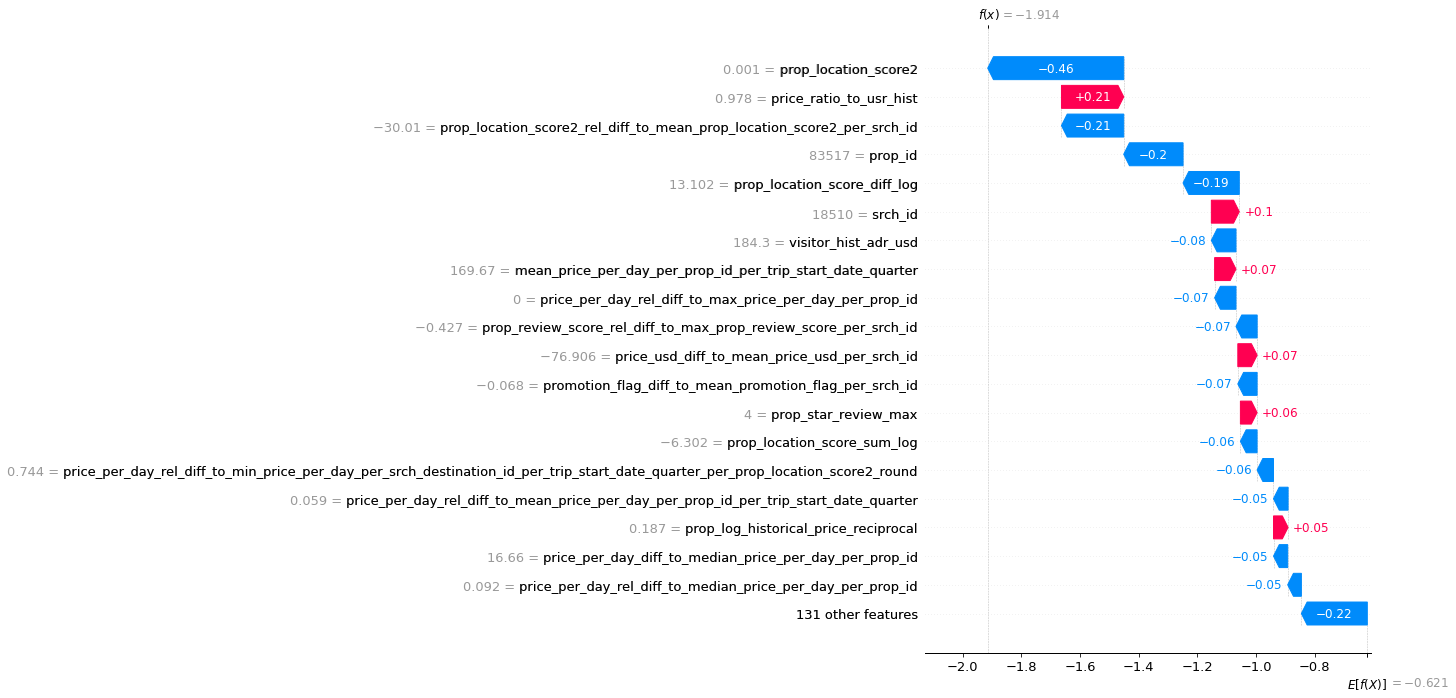

In [49]:
shap.plots.waterfall(shap_values[0], max_display=20)

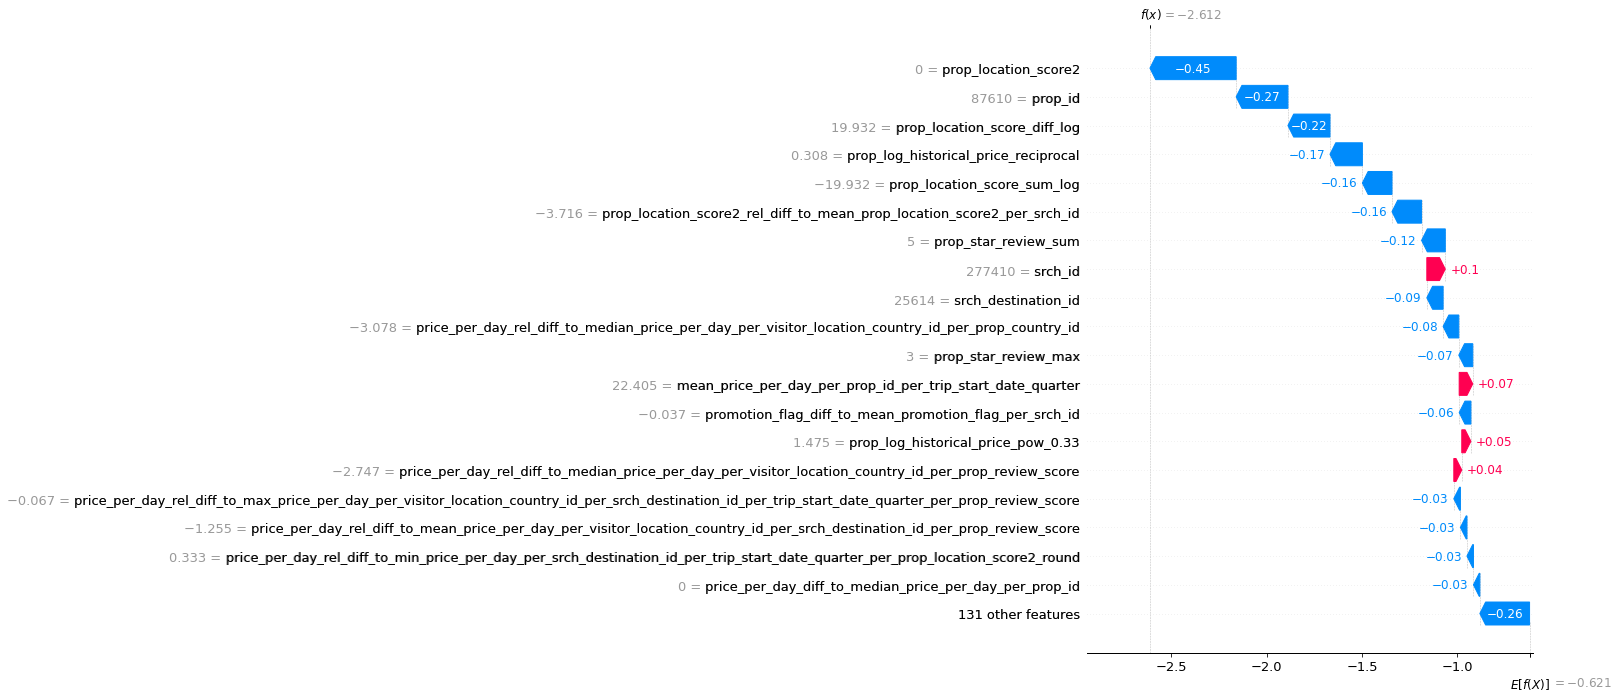

In [25]:
shap.plots.waterfall(shap_values[1], max_display=20)

In [26]:
# visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[0])

In [39]:
shap.plots.force(shap_values[10])

promotion_flag_diff_to_mean_promotion_flag_per_srch_id  
prop_location_score2  
price_index_per_srch_id

In [56]:
# visualize all the training set predictions
shap.plots.force(shap_values[::100, :])

To understand how a single feature effects the output of the model we can plot the SHAP value of that feature vs. the value of the feature for all the examples in a dataset. Since SHAP values represent a feature's responsibility for a change in the model output. Vertical dispersion at a single value represents interaction effects with other features. To help reveal these interactions we can color by another feature. If we pass the whole explanation tensor to the color argument the scatter plot will pick the best feature to color by. 

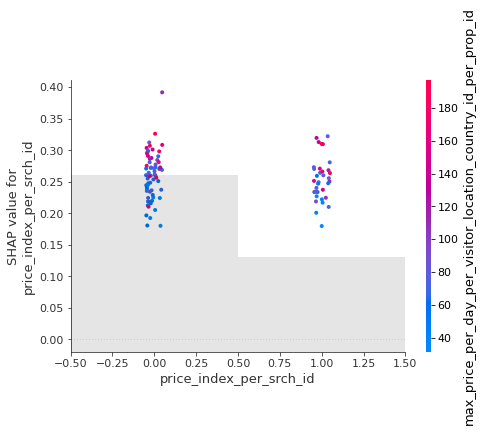

In [57]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:100, "price_index_per_srch_id"], color=shap_values[:100])

To get an overview of which features are most important for a model we can plot the SHAP values of every feature for every sample. The plot below sorts features by the sum of SHAP value magnitudes over all samples, and uses SHAP values to show the distribution of the impacts each feature has on the model output. The color represents the feature value (red high, blue low).

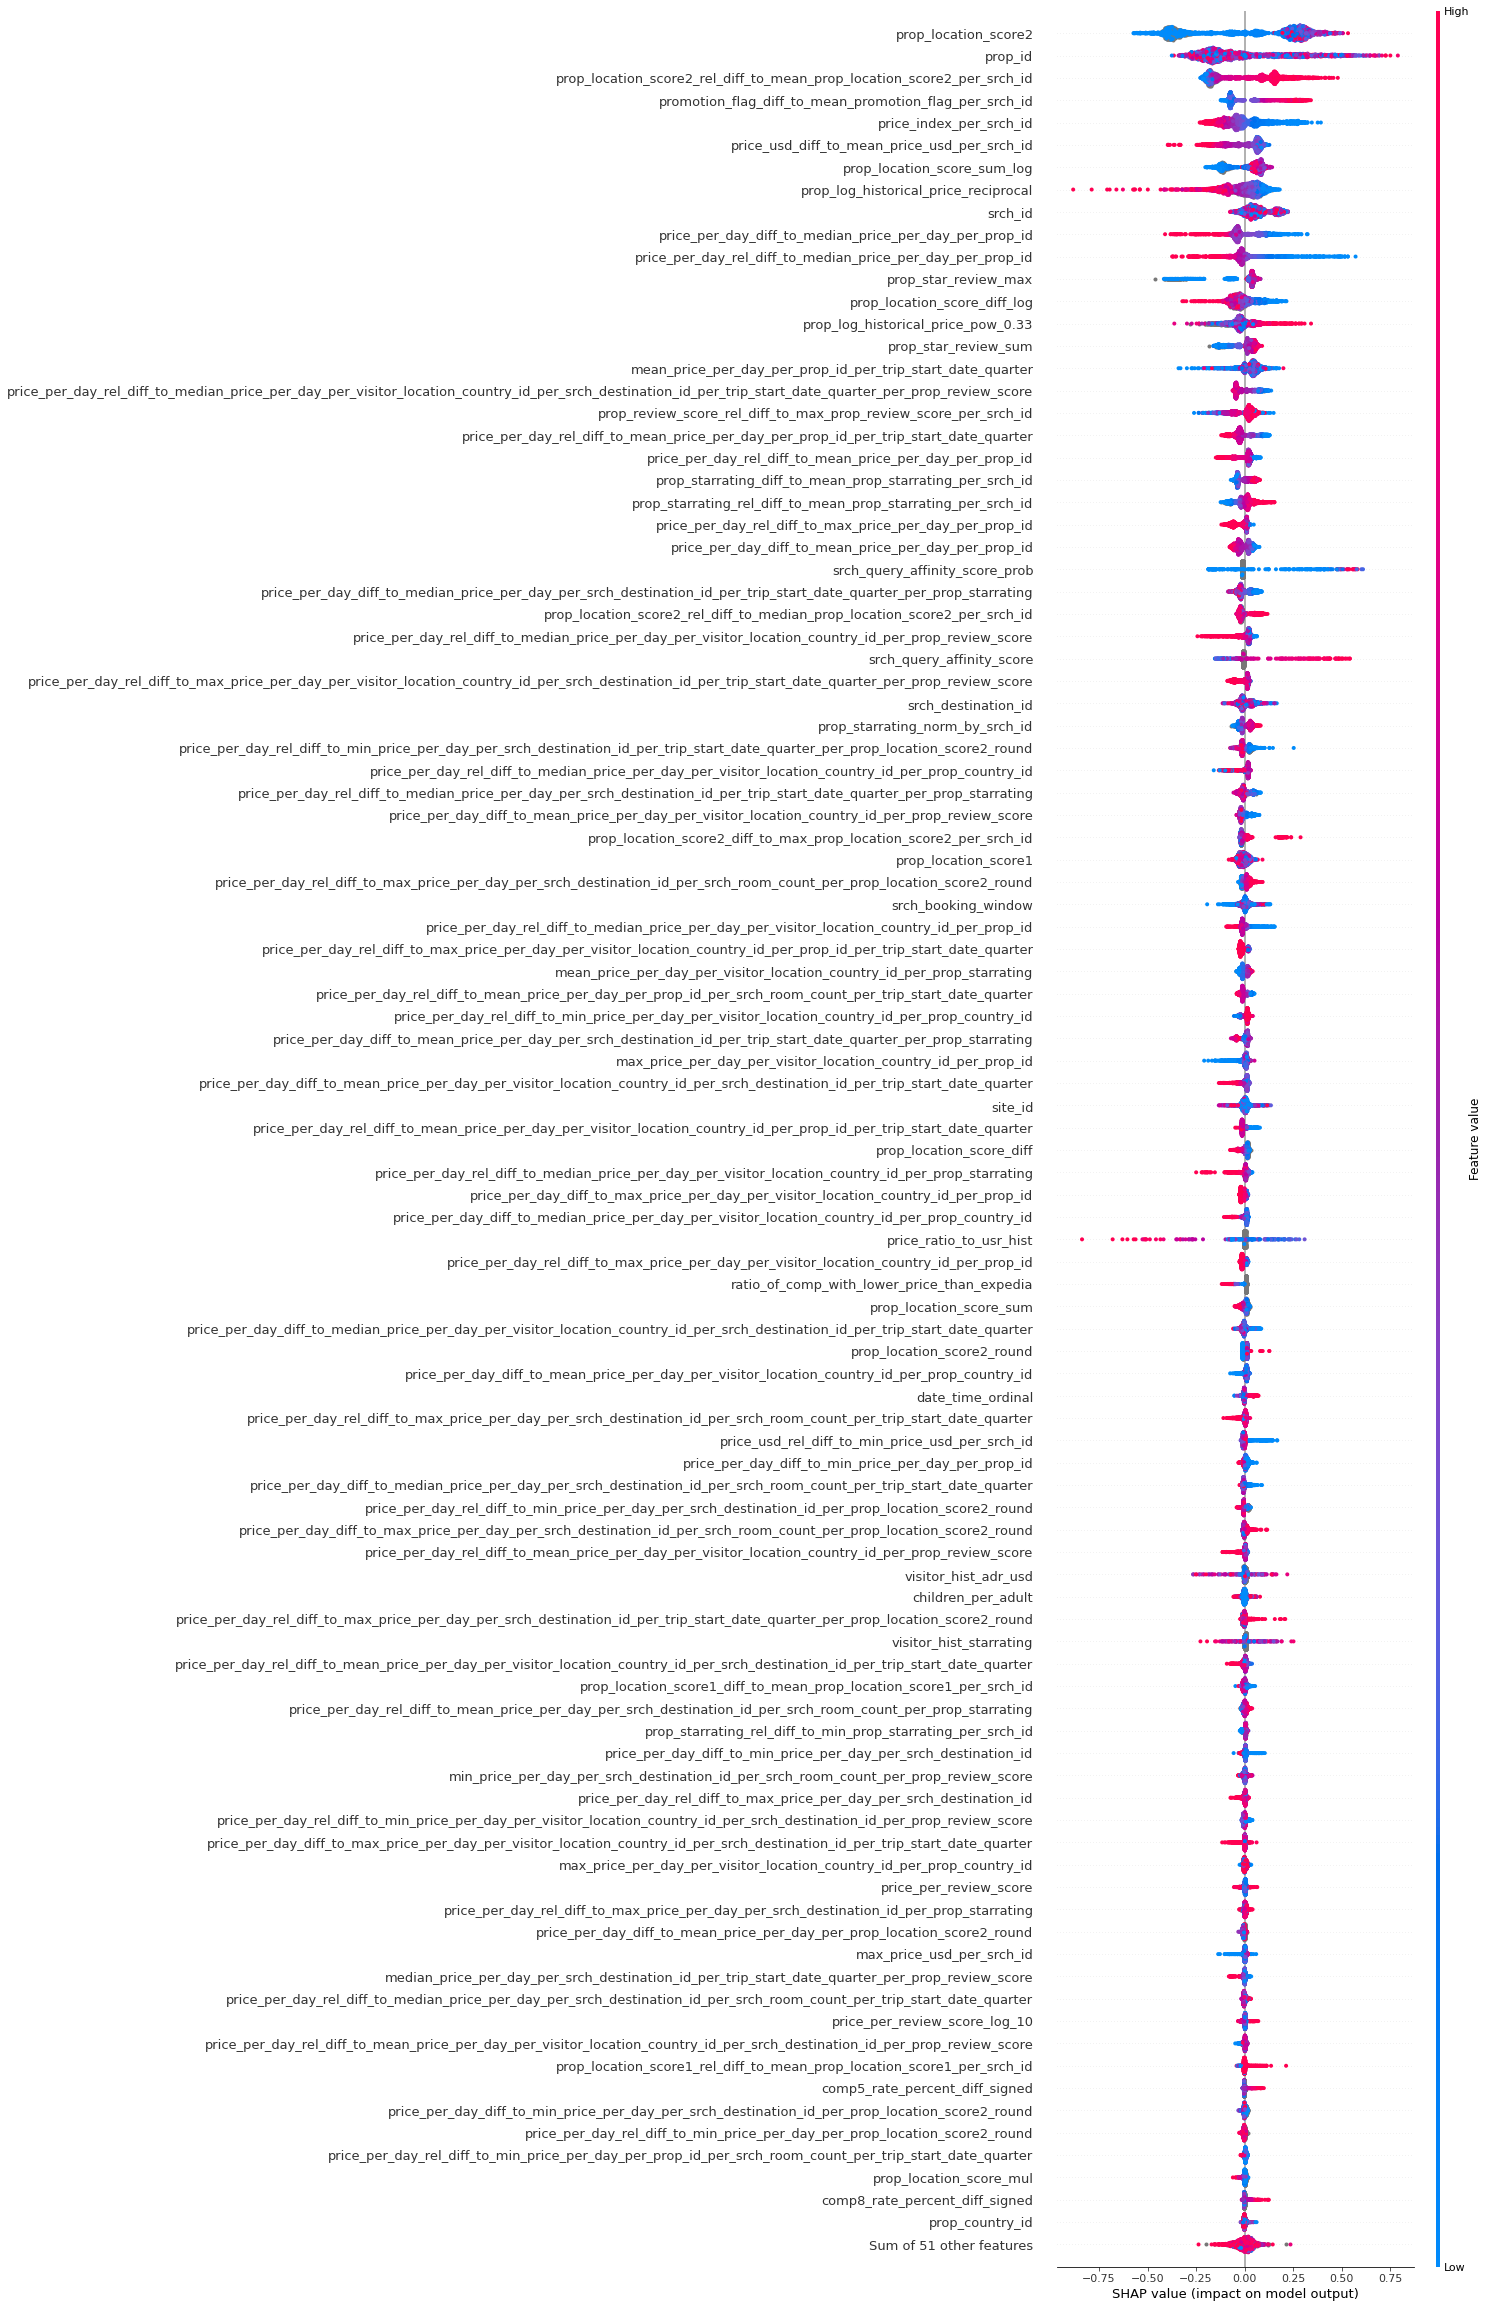

In [43]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values, max_display=100)

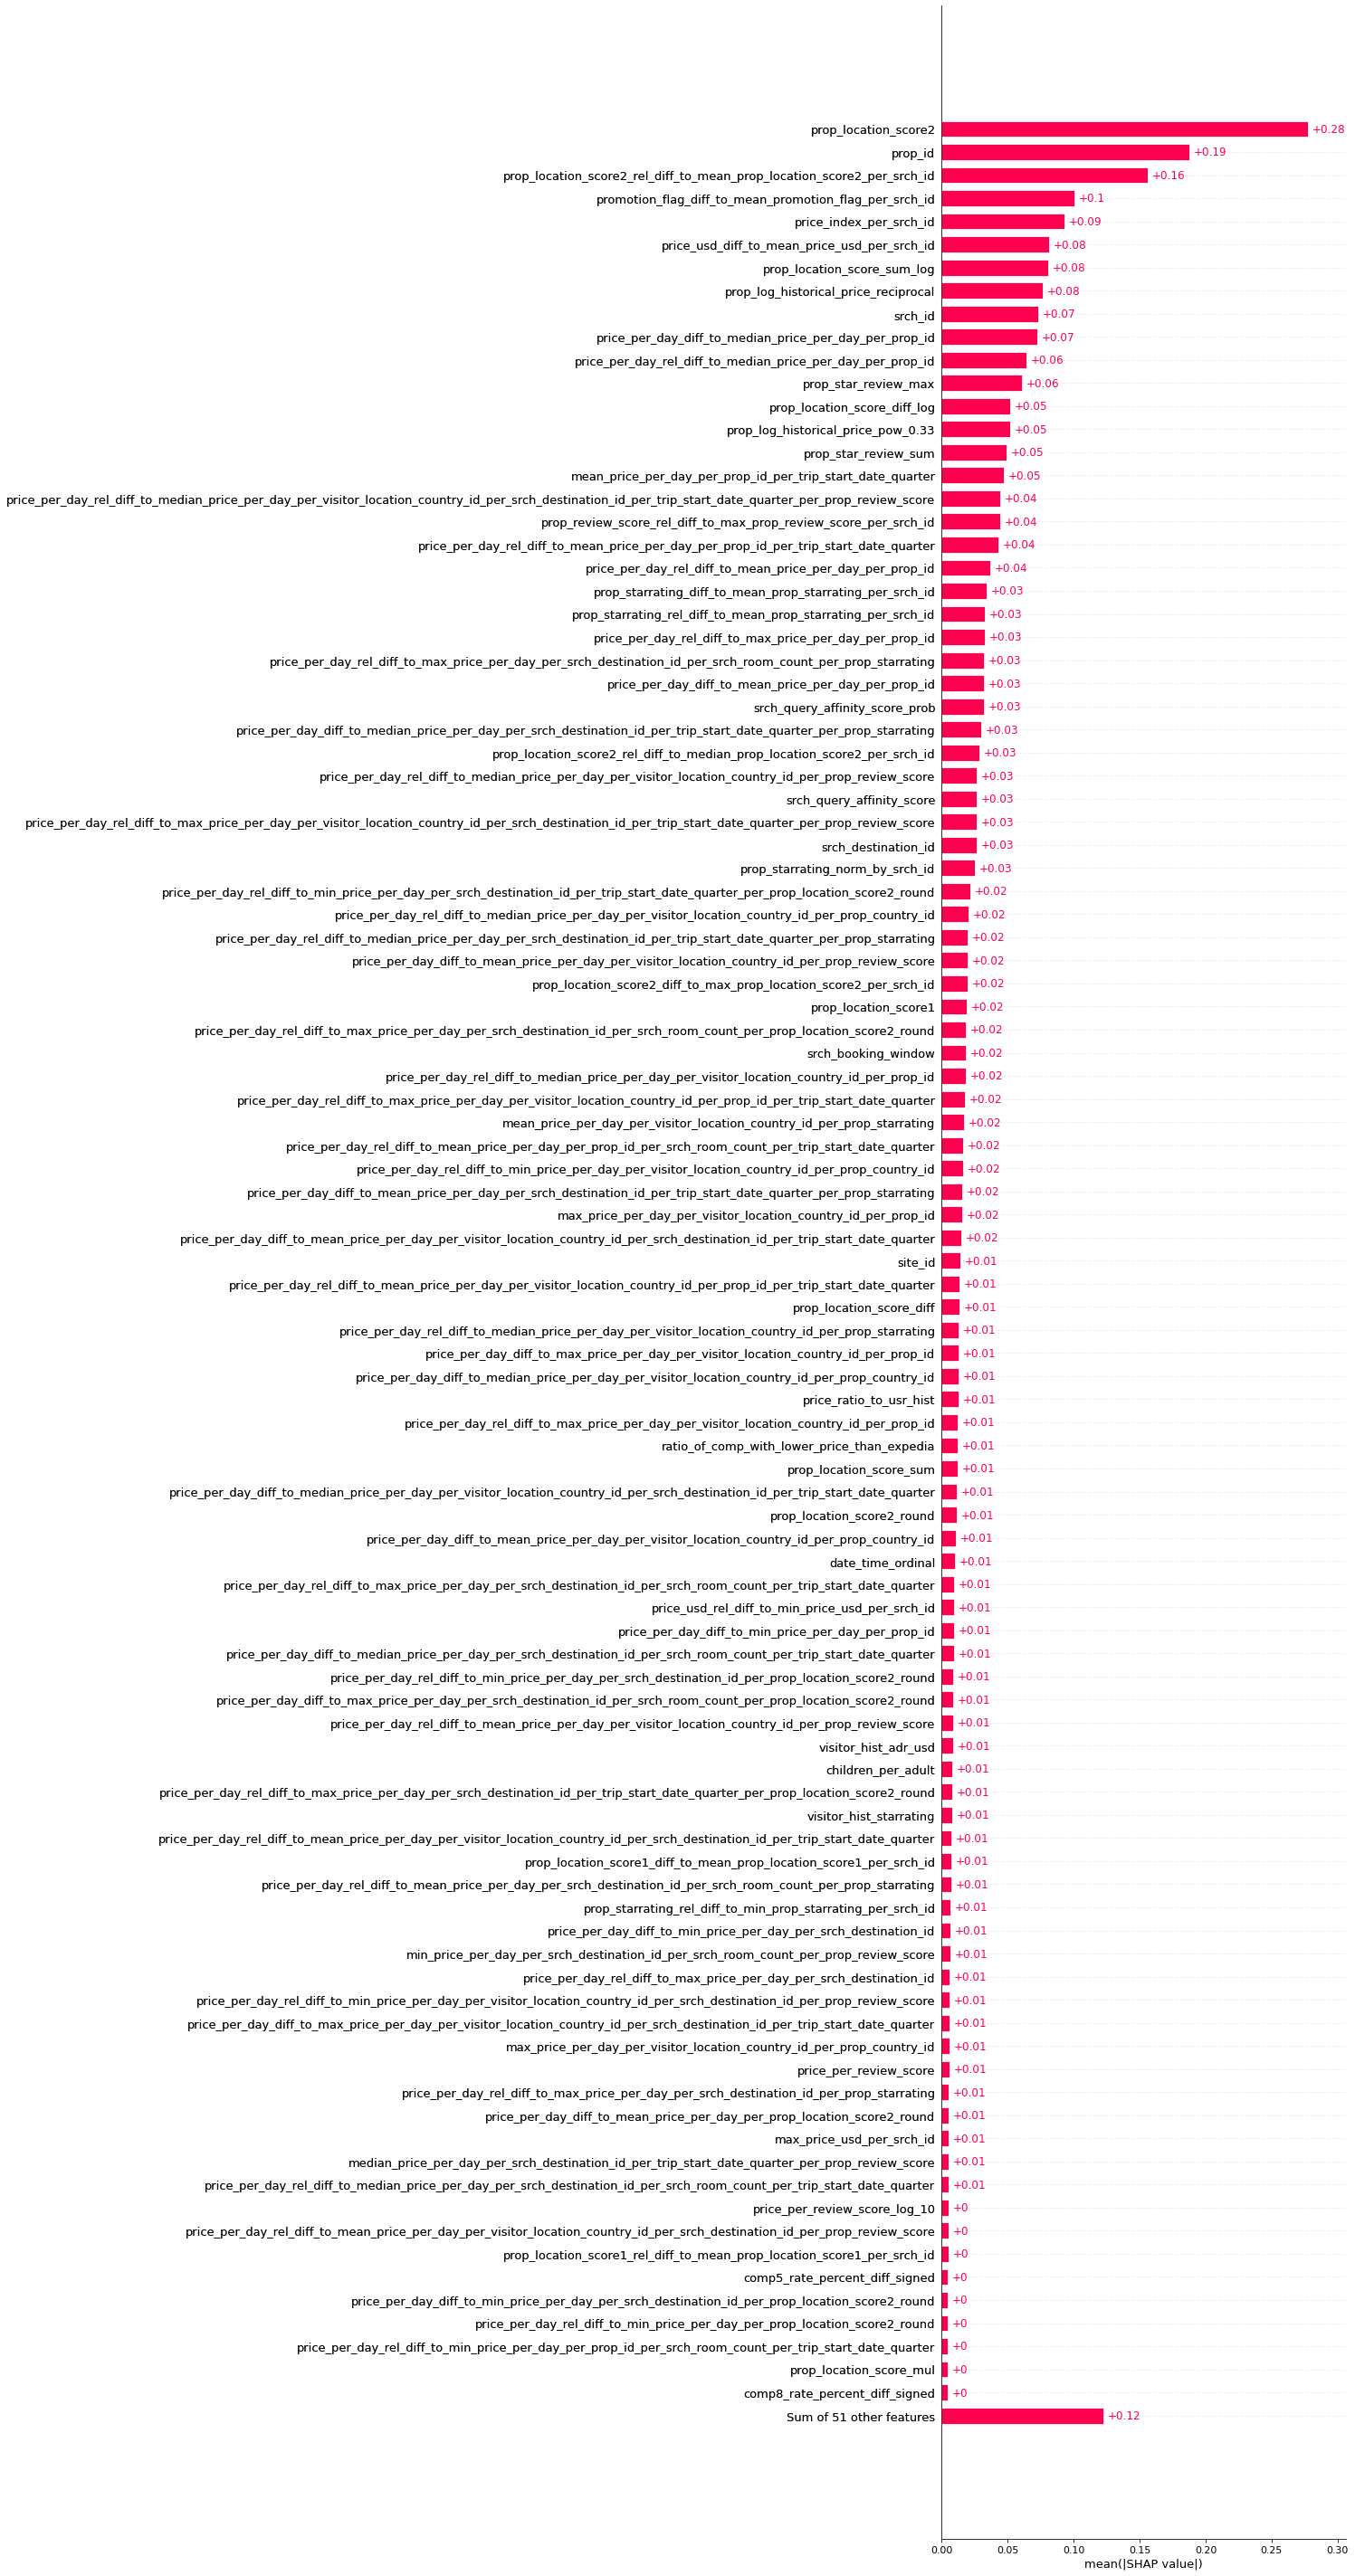

In [44]:
shap.plots.bar(shap_values, max_display=100)

SHAP interaction values are a generalization of SHAP values to higher order interactions. Fast exact computation of pairwise interactions are implemented for tree models with shap.TreeExplainer(model).shap_interaction_values(X). This returns a matrix for every prediction, where the main effects are on the diagonal and the interaction effects are off-diagonal. These values often reveal interesting hidden relationships

https://slundberg.github.io/shap/notebooks/plots/dependence_plot.html

In [59]:
# explainer.shap_interaction_values(X_val.head(10))

In [ ]:
# feature_score_PredictionValuesChange = get_and_plot_feature_imp_catboost(
#         model, X_val, y_val,
#         cat_features=CAT_FEATURES,
#         method='PredictionValuesChange',
#         top_n=COLLECT_N_IMPORTANT_FEATURES)

#     important_features_collected.update(feature_score_PredictionValuesChange.sort_values(['Score'], ascending=False).values[:COLLECT_N_IMPORTANT_FEATURES, 0])

For each feature, LossFunctionChange represents the difference between the loss value of the model with this feature and without it.

+ more accurate than Prediction Values Change
+ more fast than Shap Values
- assumes that loss function changes for several features can be summed up

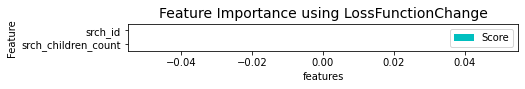

In [384]:
import matplotlib.pyplot as plt

for method in ['LossFunctionChange']:
    fi = model.get_feature_importance(val_pool, type=method)
    feature_score_raw = pd.DataFrame(list(zip(X_val.columns, fi)),
                                     columns=['Feature', 'Score'])

    feature_score = feature_score_raw.sort_values(
        by='Score', ascending=False)

    plt.rcParams["figure.figsize"] = (7, len(feature_score) / 4)
    ax = feature_score.plot('Feature', 'Score', kind='barh', color='c')
    ax.set_title("Feature Importance using {}".format(method), fontsize=14)
    ax.set_xlabel("features")
    ax.invert_yaxis()
    plt.show()

In [ ]:
feature_score.sort_values('Feature')

In [ ]:
feature_score['per_col'] = feature_score['Feature'].apply(lambda x: ''.join(x.split('per_')[1:]))
feature_score[feature_score['per_col'] != ''].sort_values('per_col').drop(['per_col'], axis=1)